All ovarian cells: 52,500 single cells from embryonic day
11.5 (E11.5) postembryonic to day 5 (P5) gonads.

Dataset URL:
https://www.ncbi.nlm.nih.gov/
GEO: GSE136441
Two distinct pathways of pregranulosa cell
differentiation support follicle formation in the
mouse ovary. (Niu & Spradling 2020)

In [1]:
library(Matrix)
library(Seurat)
library(ggplot2)
library(cowplot)


library(SeuratData)
library(SeuratWrappers)
library(Azimuth)
library(patchwork)
options(future.globals.maxSize = 1e9)
options(Seurat.object.assay.version = "v5")
library(dplyr)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')

── Installed datasets ───────────────────────────────────── SeuratData v0.2.2 ──

✔ pbmcref 1.0.0                         


────────────────────────────────────── Key ─────────────────────────────────────

✔ Dataset loaded successfully
❯ Dataset built with a newer version of Seurat than installed
❓ Unknown version of Seurat installed


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Attaching shinyBS


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Att

In [2]:
importData <- function(files,sample) {
    
    
  raw_counts <- readMM(files['raw']) #load the data as a sparse matrix  
  raw_counts = raw_counts * 0.5
  writeMM(raw_counts, file="matrix.mtx")
    
    expression_matrix <- ReadMtx(
      mtx = "matrix.mtx", features = files['genes'],
      cells = files['cells']
    )

  pbmc <- CreateSeuratObject(counts = expression_matrix, min.cells = 300, min.features = 500)
  pbmc[["Sample"]] <- sample 
 
  prot_coding <-  read.delim("data/prot_coding.csv", header = FALSE, sep = ",", dec = ".")$V2
  prot_coding <- prot_coding[!prot_coding %in% prot_coding[grep("^mt-",prot_coding)]]
  prot_coding <- prot_coding[!prot_coding %in% prot_coding[grep("^Rb",prot_coding)]]
  prot_coding <- prot_coding[!prot_coding %in% prot_coding[grep("^Rp",prot_coding)]] 
  #, variable.features.n = 1000,do.scale = TRUE 
  pbmc <- pbmc[rownames(pbmc) %in% prot_coding,]
  pbmc <- SCTransform(pbmc, ncells = 3000, verbose = FALSE)

  return(pbmc)
    

}

In [3]:
files = c( "raw"   = "data/GSM4643732_E11.5gonad_matrix.mtx.gz",
           "genes" = "data/GSM4643732_E11.5gonad_genes.tsv.gz",
           "cells" = "data/GSM4643732_E11.5gonad_barcodes.tsv.gz" 
         )
pbmcE11 <-importData(files,"E11")

In [4]:
files = c( "raw"   = "data/GSM4643733_E12.5ovary_matrix.mtx.gz",
           "genes" = "data/GSM4643733_E12.5ovary_genes.tsv.gz",
           "cells" = "data/GSM4643733_E12.5ovary_barcodes.tsv.gz" 
         )
pbmcE12 <-importData(files,"E12")
#pbmcE12 = pbmcE12[,1:4000]

In [5]:
files = c( "raw"   = "data/GSM4643734_E14.5ovary_matrix.mtx.gz",
           "genes" = "data/GSM4643734_E14.5ovary_genes.tsv.gz",
           "cells" = "data/GSM4643734_E14.5ovary_barcodes.tsv.gz" 
         )
pbmcE14 <-importData(files,"E14")
pbmcE14


An object of class Seurat 
19844 features across 10488 samples within 2 assays 
Active assay: SCT (9922 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA

In [6]:
files = c( "raw"  = "data/GSM4643735_E16.5ovary_matrix.mtx.gz",
           "genes" = "data/GSM4643735_E16.5ovary_genes.tsv.gz",
           "cells" = "data/GSM4643735_E16.5ovary_barcodes.tsv.gz" 
         )
pbmcE16 <-importData(files,"E16")
pbmcE16

An object of class Seurat 
22338 features across 9811 samples within 2 assays 
Active assay: SCT (11169 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA

In [7]:
files = c( "raw"   = "data/GSM4643736_E18.5ovary_matrix.mtx.gz",
           "genes" = "data/GSM4643736_E18.5ovary_genes.tsv.gz",
           "cells" = "data/GSM4643736_E18.5ovary_barcodes.tsv.gz" 
         )
pbmcE18 <- importData(files,"E18")
pbmcE18

An object of class Seurat 
15590 features across 3668 samples within 2 assays 
Active assay: SCT (7795 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA

In [8]:
files = c( "raw"   = "data/GSM4643737_P1ovary_matrix.mtx.gz",
           "genes" = "data/GSM4643737_P1ovary_genes.tsv.gz",
           "cells" = "data/GSM4643737_P1ovary_barcodes.tsv.gz" 
         )
pbmcP1 <-importData(files,"P1")
pbmcP1

An object of class Seurat 
17484 features across 5538 samples within 2 assays 
Active assay: SCT (8742 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA

In [9]:
files = c( "raw"   = "data/GSM4643738_P5ovary_matrix.mtx.gz",
           "genes" = "data/GSM4643738_P5ovary_genes.tsv.gz",
           "cells" = "data/GSM4643738_P5ovary_barcodes.tsv.gz" 
         )
pbmcP5 <-importData(files,"P5")
pbmcP5

An object of class Seurat 
17526 features across 5751 samples within 2 assays 
Active assay: SCT (8763 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA

In [10]:
load("data/ovaryP7-P14-M.Rdata")


In [11]:
pbmcP714

An object of class Seurat 
31612 features across 23534 samples within 2 assays 
Active assay: SCT (15547 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [12]:
#load("data/ovaryAdult-mesenchyme-named.Rdata")
load("../Morris/data/morris-all.Rdata")
pbmcAdult <- pbmc
pbmcAdult


An object of class Seurat 
36228 features across 33838 samples within 2 assays 
Active assay: SCT (17773 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [13]:
#pbmcAdult[["Sample"]] <- pbmcAdult[["CellType"]] 

In [14]:
pbmc <- merge(pbmcE11, y = c( pbmcE12,pbmcE14,pbmcE16,pbmcE18,pbmcP1,pbmcP5,pbmcP714,pbmcAdult), 
              add.cell.ids = c("E11","E12","E14","E16","E18","P1","P5","P714","Adult"), project = "ovaryDev")
pbmc

An object of class Seurat 
38098 features across 105355 samples within 2 assays 
Active assay: SCT (18701 features, 0 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA

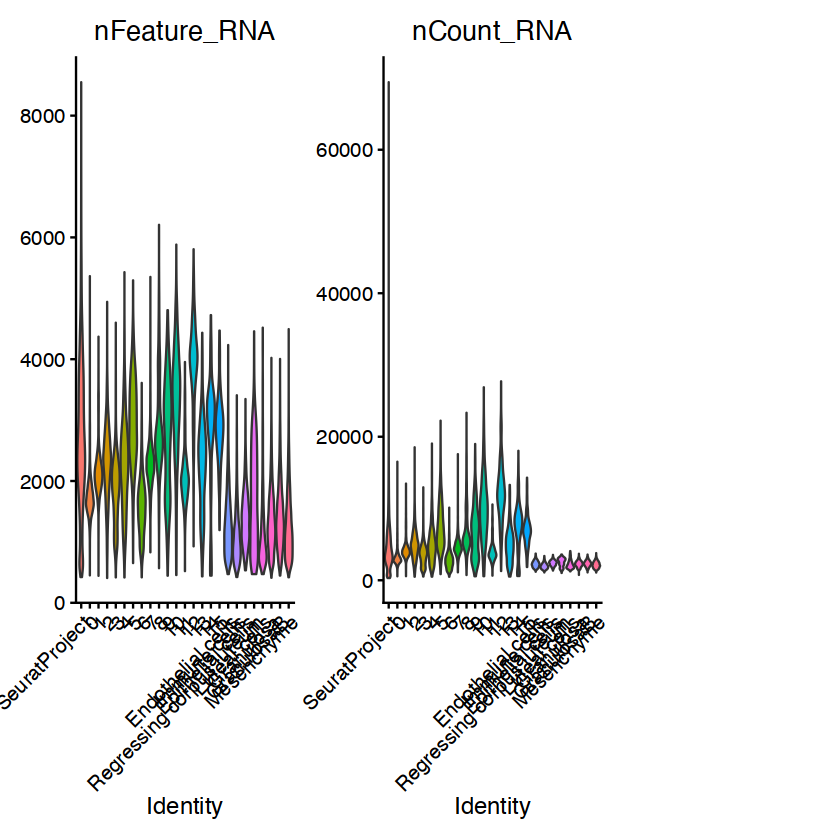

In [15]:
#pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^mt-")
# Visualize QC metrics as a violin plot
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA"), ncol = 3, pt.size = 0)

In [16]:

#pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc <- SCTransform(pbmc, ncells = 3000, verbose = FALSE)
#pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 1000)
#pbmc <- ScaleData(pbmc)

Warning message:
“Different cells and/or features from existing assay SCT”


In [17]:
pbmc <- RunPCA(pbmc)
pbmc <- RunUMAP(pbmc, dims = 1:20)

PC_ 1 
Positive:  Inha, Igfbp7, Wbp5, Hsd3b1, eGFP, Akr1cl, Gm17541, Gja1, Gnb2l1, Foxo1 
	   Col1a2, Socs2, Cyp11a1, Serpine2, Junb, Dcn, Tceb2, Shfm1, Nme2, Sep15 
	   Fos, Cpe, Gm10709, Selk, Nr5a2, Acta2, Acsbg1, Sulf2, Ephx2, Thbs1 
Negative:  Hba-a1, Hbb-bs, Hbb-bt, Hba-a2, Car2, Gypa, Alas2, Hemgn, Slc4a1, Hbb-y 
	   Hba-x, Rhd, Hbb-bh1, Slc25a37, Cd24a, Blvrb, Gpx1, Mki67, Cpox, Hmbs 
	   Prdx2, Hmgb2, Hist1h1b, Pnpo, Snca, Ermap, Cldn13, Ube2c, Ctse, Hspa1a 
PC_ 2 
Positive:  Hbb-bt, Hsd3b1, Hba-a2, Hba-a1, Gm17541, Foxo1, Hbb-bs, Gja1, Cyp11a1, Nr5a2 
	   Car2, Nkain3, Ttf1, Gm9493, Atp6v0c, Epas1, Prkar2b, Sfrp4, Scarb1, Inha 
	   Mgarp, Gm4076, Sema5a, Bmpr2, Ephx2, Acsbg1, Nme2, Heph, Prlr, Txnip 
Negative:  eGFP, Fau, Ftl1, Tmsb4x, Dcn, Ptn, Mfap4, Dlk1, Actb, Lgals1 
	   Cyr61, Cdkn1c, Tmsb10, Mdk, Fos, Ptma, Ubb, H2afz, Cfl1, Junb 
	   Hsp90aa1, Eef1a1, Ier2, Ifitm2, H3f3b, Hmgb1, Sparc, Col1a1, Maged2, Gm10709 
PC_ 3 
Positive:  Inha, Smc1b, Sycp1, 4930447C04Rik, Sycp3

In [18]:
#   pbmc <- SCTransform(pbmc, ncells = 3000, verbose = FALSE) %>%
#    RunPCA(verbose = FALSE) %>%
#    RunUMAP(dims = 1:20)

In [19]:
pbmc <- FindNeighbors(pbmc, reduction = "pca", dims = 1:20)
pbmc <- FindClusters(pbmc, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 105355
Number of edges: 3584294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9629
Number of communities: 32
Elapsed time: 38 seconds


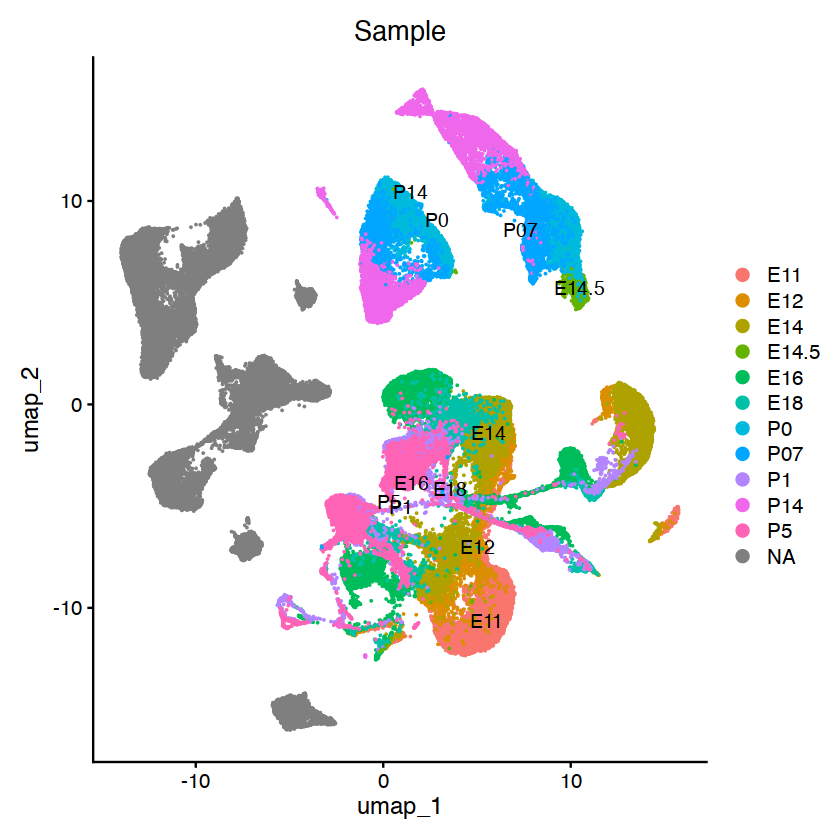

In [20]:
DimPlot(pbmc, reduction = "umap", label =TRUE,group.by = "Sample",raster=FALSE)

In [2]:
save(pbmc, file = "data/pbmc-E14-Adult2.Rdata")
#load("data/pbmc-E14-Adult2.Rdata")

Warning message in readChar(con, 5L, useBytes = TRUE):
“cannot open compressed file 'data/pbmc-E14-Adult2.Rdata', probable reason 'No such file or directory'”


ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


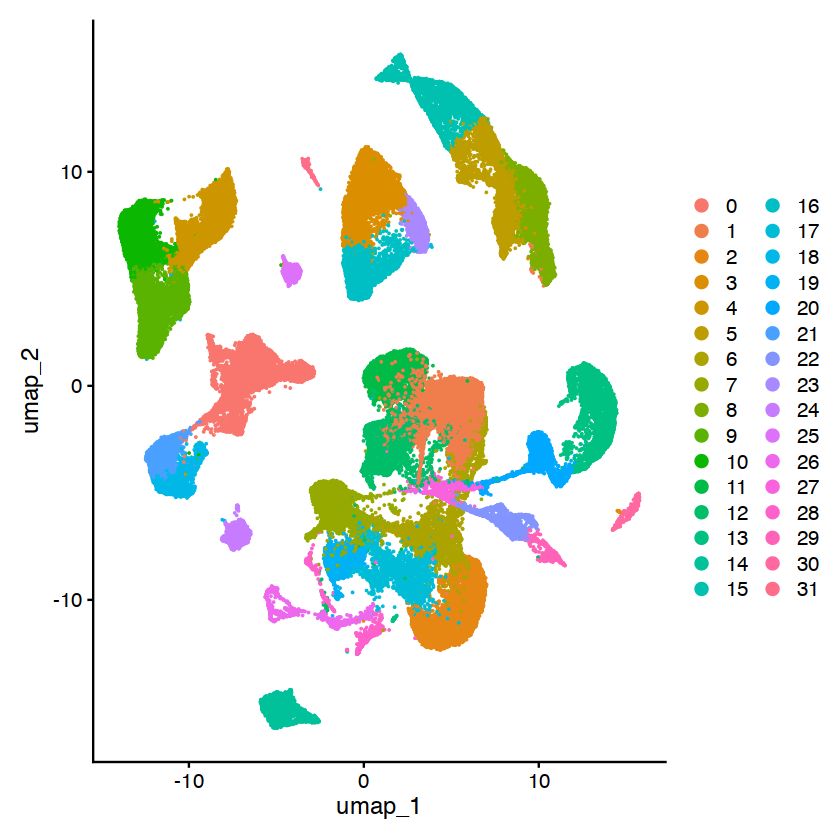

In [22]:
DimPlot(pbmc, reduction = "umap",raster=FALSE)

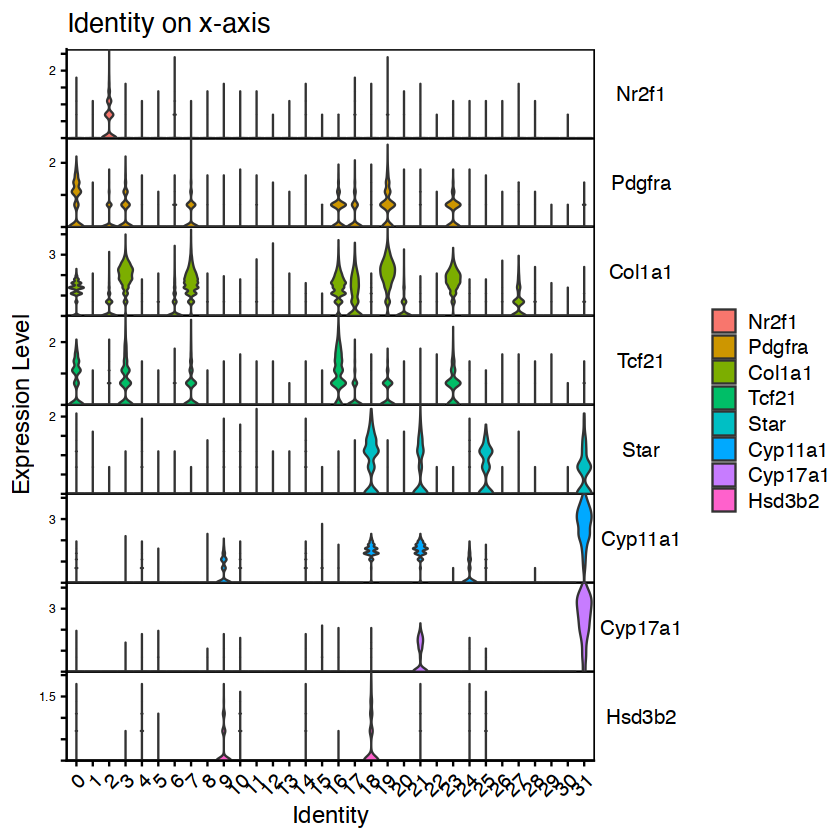

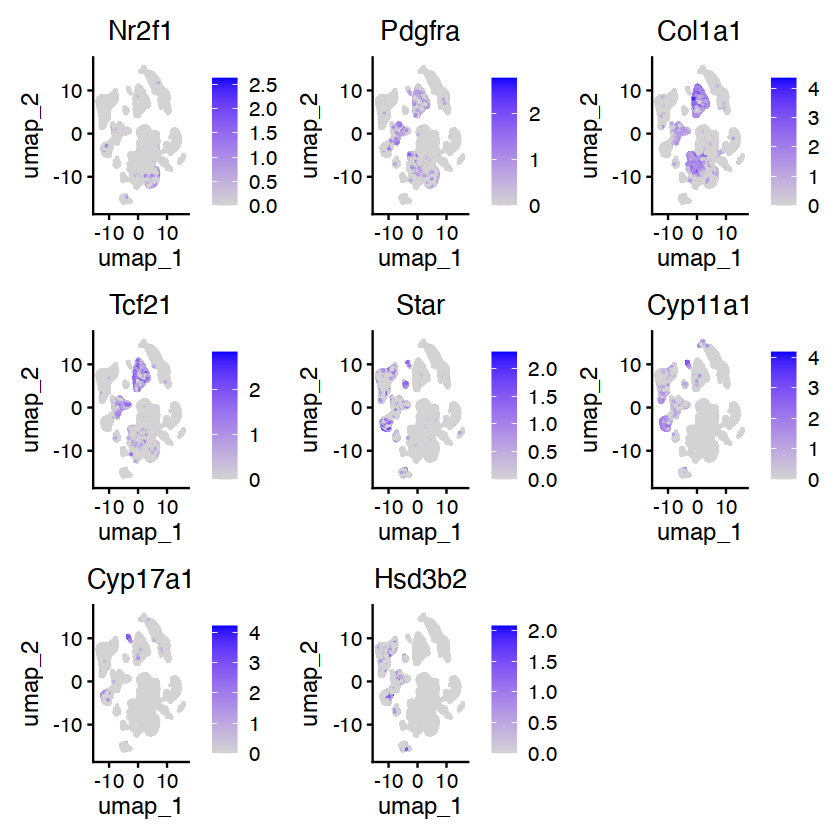

In [23]:
#Pdgfra, Col1a1, and Tcf21 Star, Cyp11a1, and Cyp17a1 Hsd3b2 
markers = c("Nr2f1","Pdgfra","Col1a1","Tcf21","Star","Cyp11a1","Cyp17a1","Hsd3b2")

VlnPlot(pbmc, markers,   stack = TRUE, sort = FALSE, flip = TRUE) +
        theme(legend.position = "right") + ggtitle("Identity on x-axis")
FeaturePlot(pbmc, features = markers,raster=FALSE) 


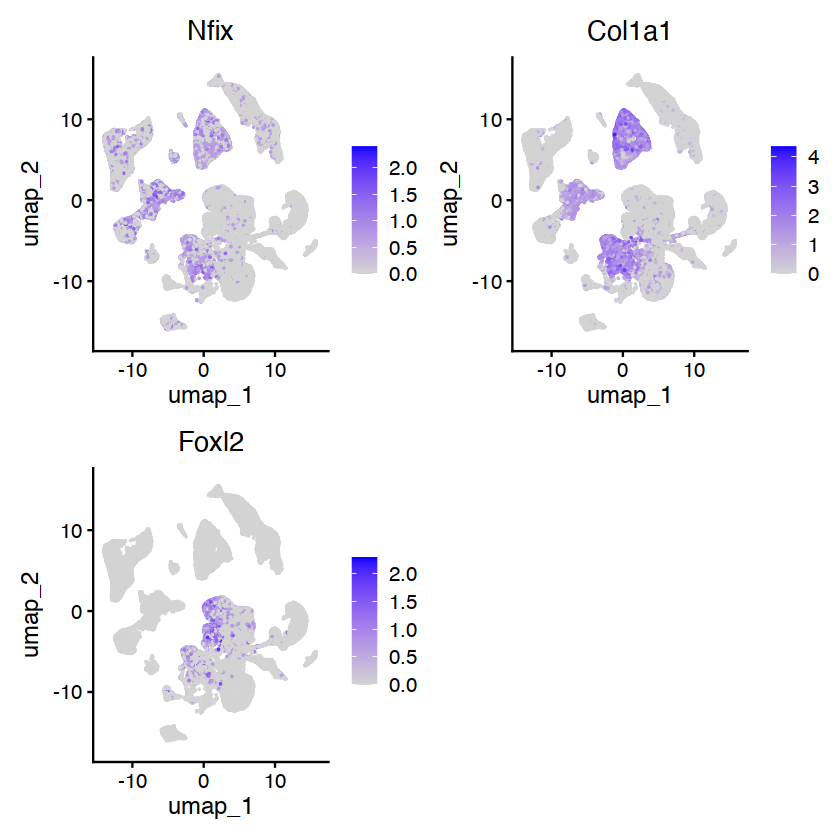

In [24]:
FeaturePlot(pbmc, features = c("Nfix","Col1a1","Foxl2"),raster=FALSE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



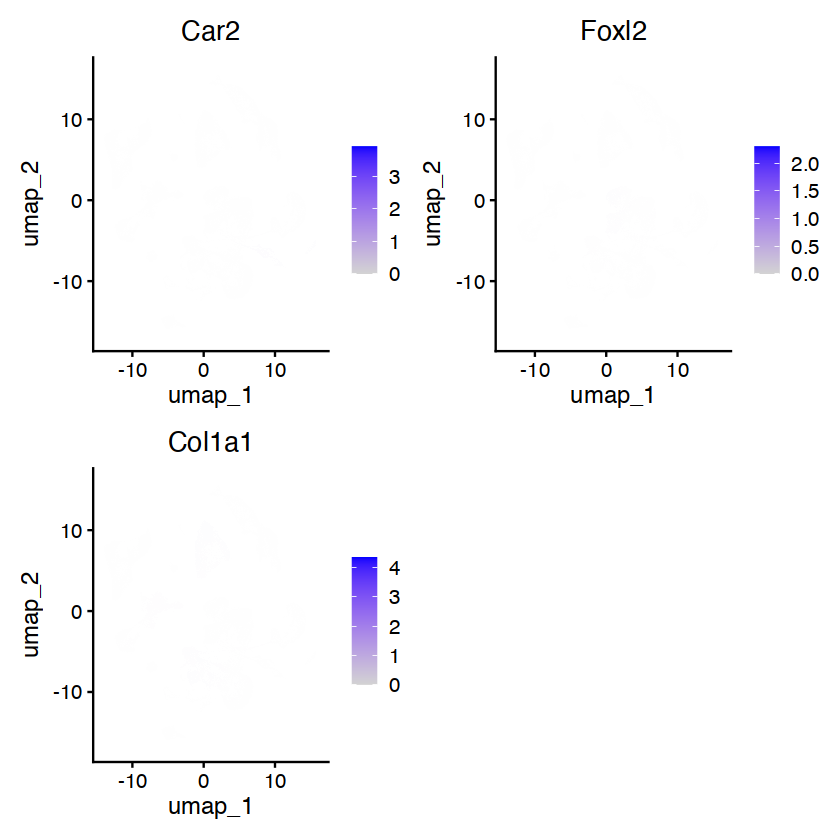

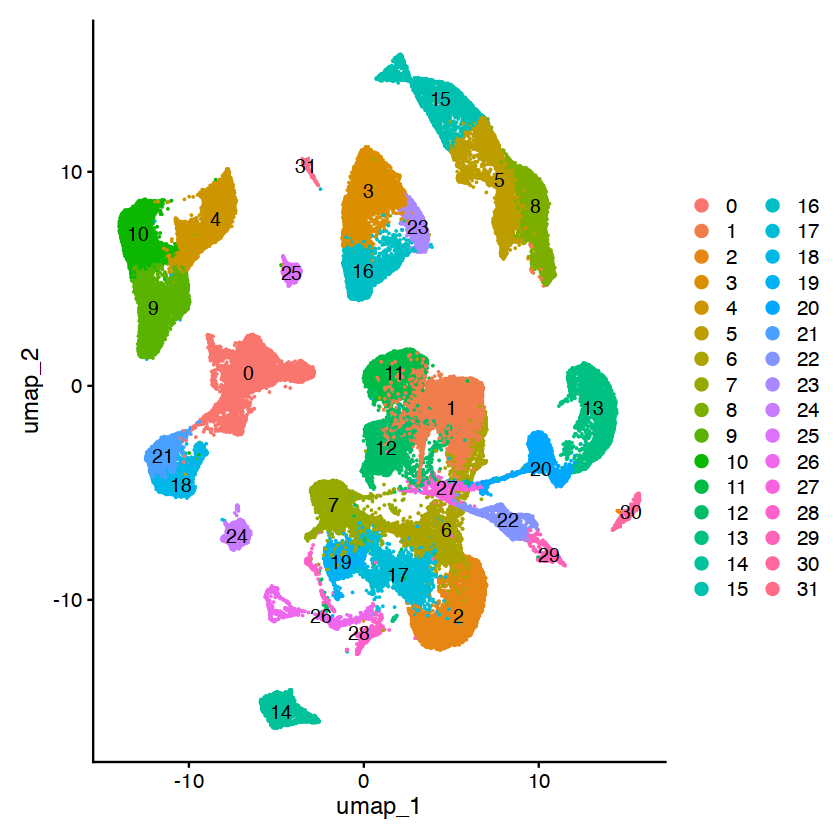

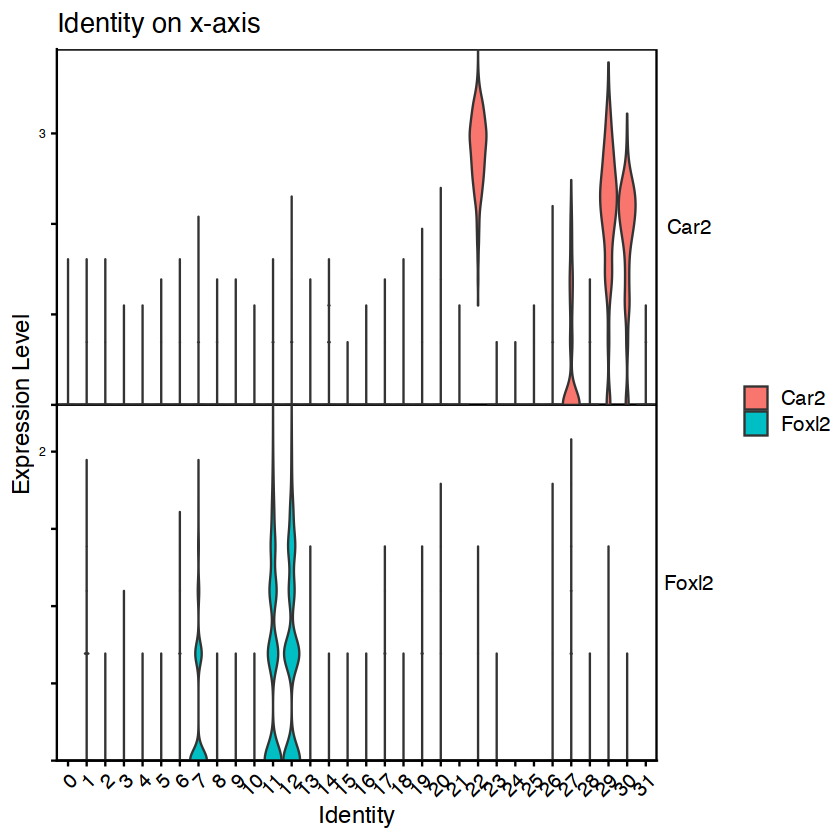

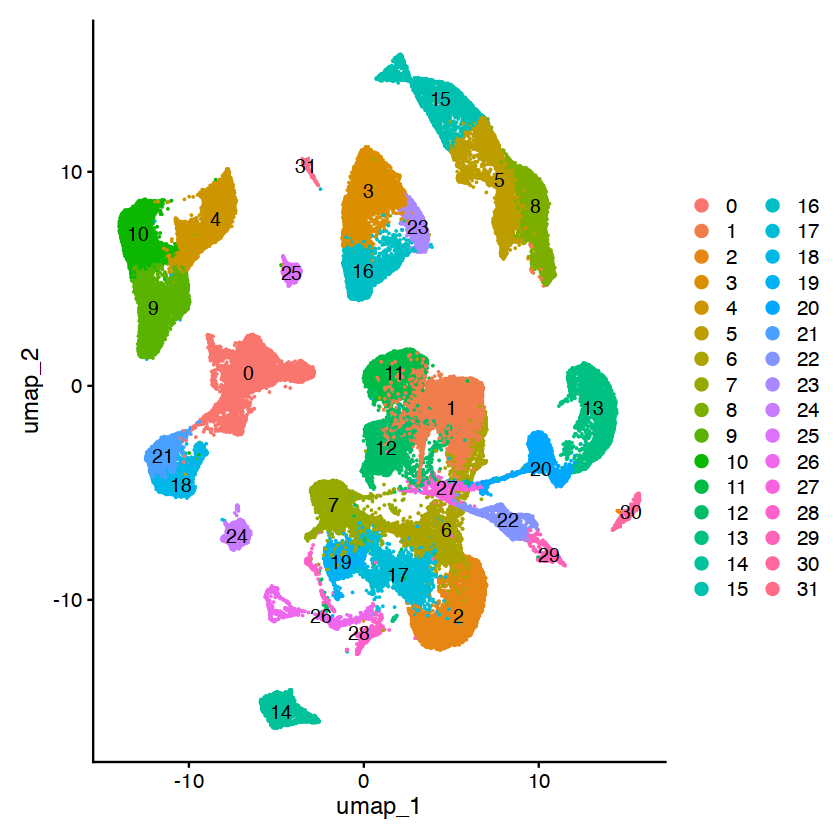

In [25]:
#endothelial/blood-related
FeaturePlot(pbmc, features = c("Car2","Foxl2","Col1a1"))
DimPlot(pbmc, reduction = "umap", label =TRUE,raster=FALSE)

VlnPlot(pbmc, c("Car2","Foxl2"),   stack = TRUE, sort = FALSE, flip = TRUE) +
        theme(legend.position = "right") + ggtitle("Identity on x-axis")
DimPlot(pbmc, reduction = "umap", label =TRUE,raster=FALSE)

In [26]:
#blood-related and outlayers
pbmc <- subset(pbmc, idents = c("22","29","30"), invert = TRUE)

In [15]:
#pbmc <- SCTransform(pbmc, ncells = 3000, verbose = FALSE, variable.features.n = 1000,do.scale = TRUE)
#pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
#pbmc <- RunUMAP(pbmc, dims = 1:20)
#pbmc <- FindNeighbors(pbmc, reduction = "pca", dims = 1:20)




In [16]:
#pbmc <- FindClusters(pbmc, resolution = 0.9)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



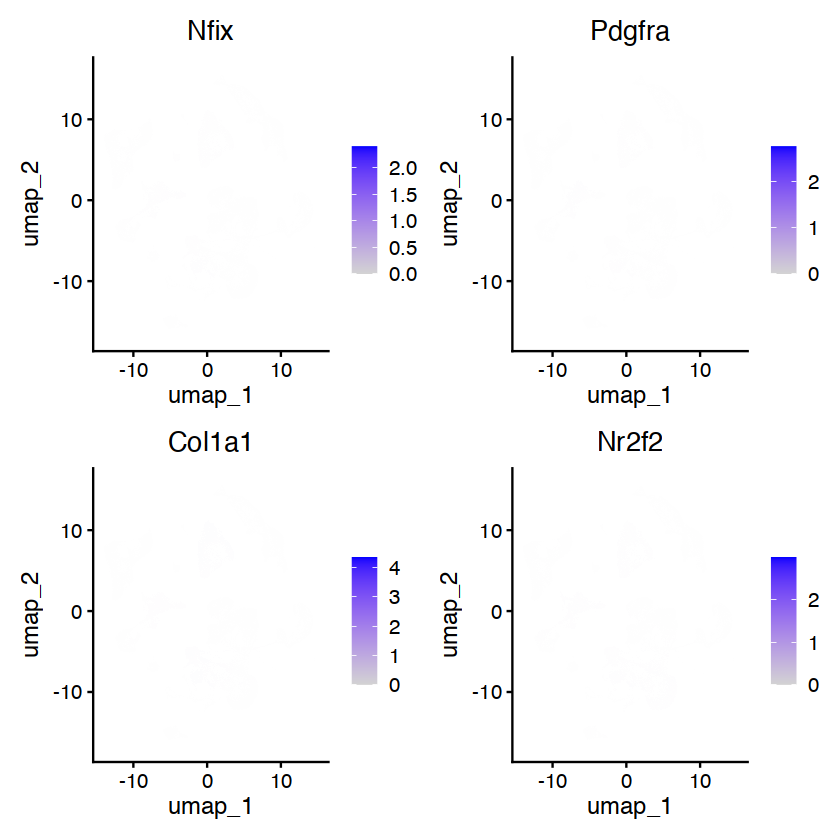

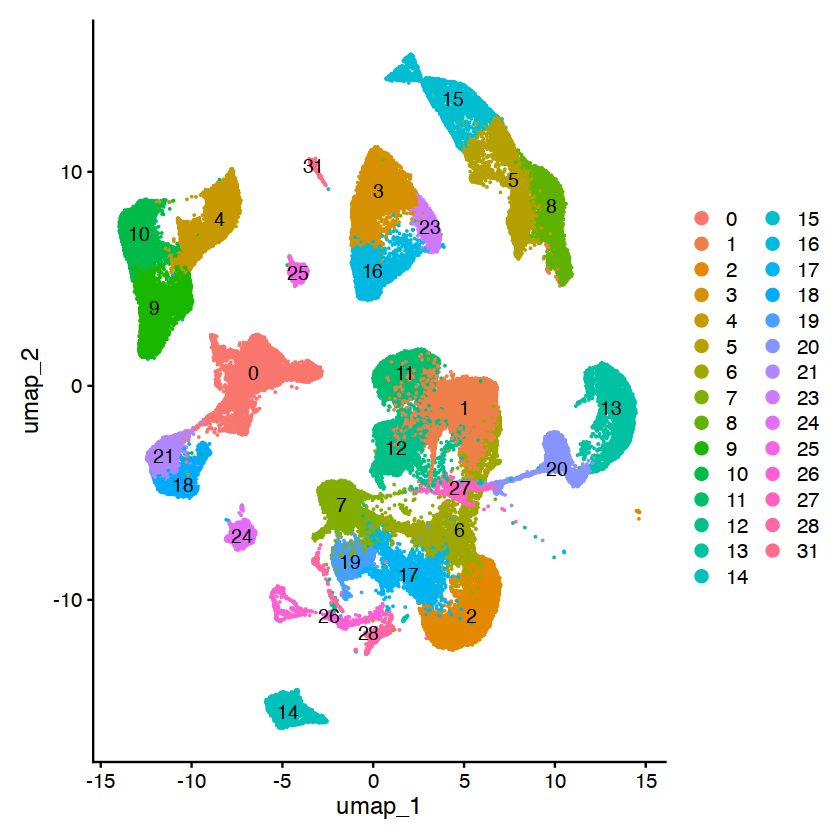

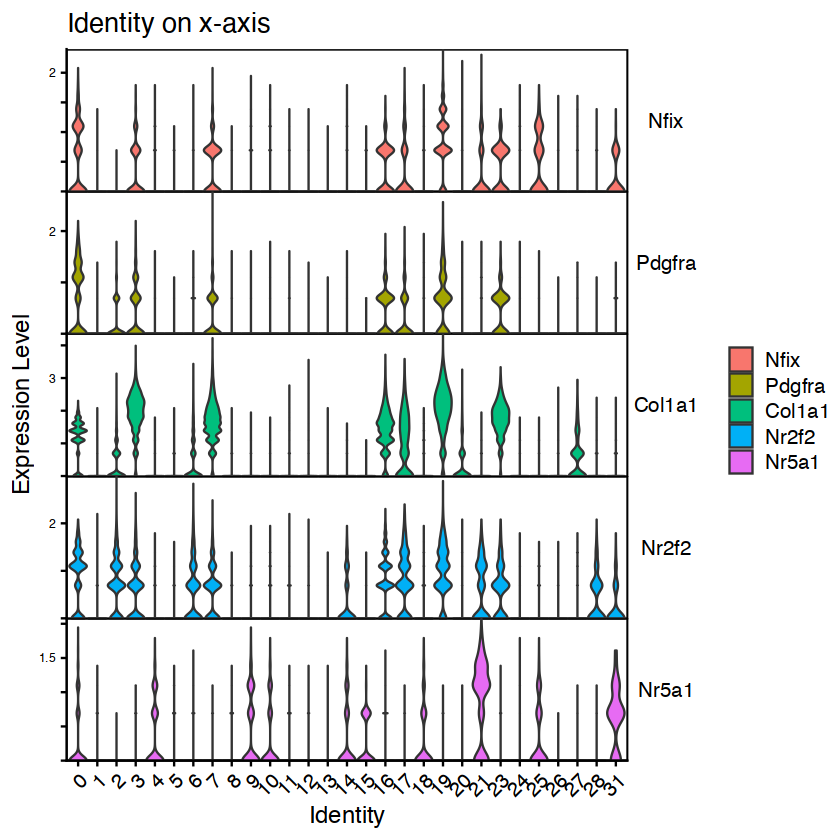

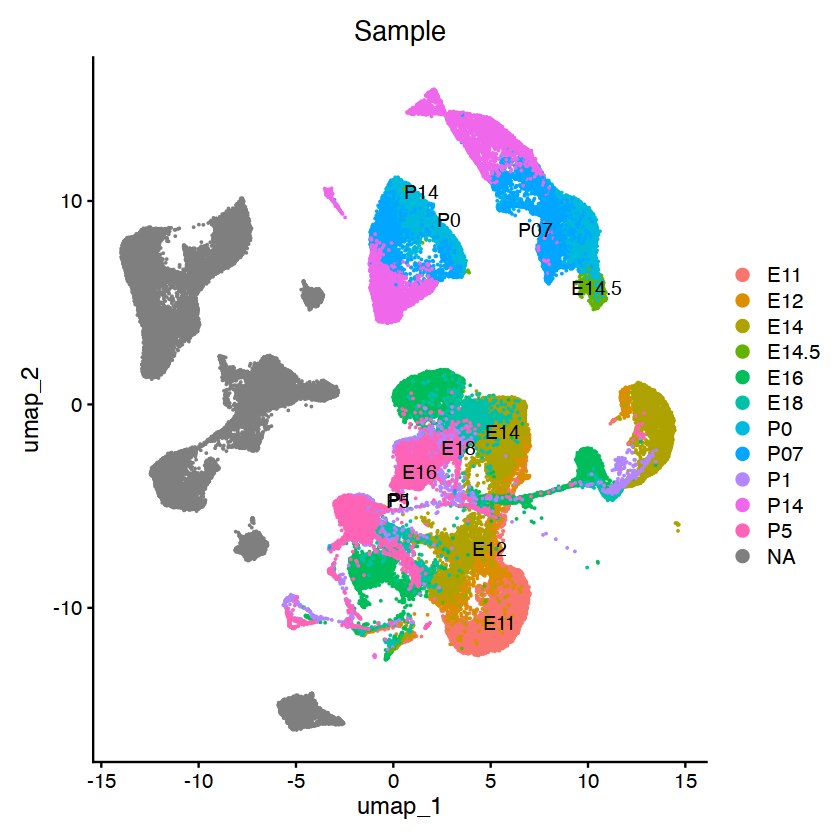

In [27]:
#Mesenchymal
FeaturePlot(pbmc, features = c("Nfix","Pdgfra","Col1a1","Nr2f2"), raster=FALSE)
DimPlot(pbmc, reduction = "umap", label =TRUE,raster=FALSE)
VlnPlot(pbmc, c("Nfix","Pdgfra","Col1a1","Nr2f2","Nr5a1"),   stack = TRUE, sort = FALSE, flip = TRUE) +
        theme(legend.position = "right") + ggtitle("Identity on x-axis")

DimPlot(pbmc, reduction = "umap", label =TRUE,group.by = "Sample",raster=FALSE)

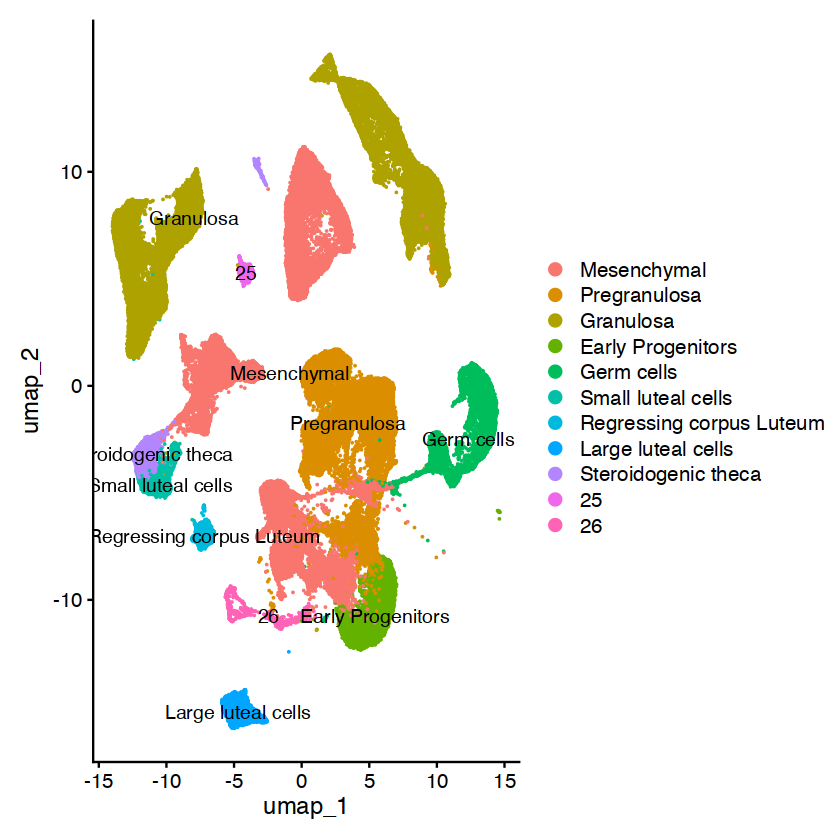

In [51]:
pbmc <- RenameIdents(pbmc, '0' = 'Mesenchymal','3' = 'Mesenchymal','7' = 'Mesenchymal',
                     '16' = 'Mesenchymal','17' = 'Mesenchymal',
                     '23' = 'Mesenchymal','27' = 'Mesenchymal','19' = 'Mesenchymal'
                     
                                                )
DimPlot(pbmc, reduction = "umap", label =TRUE, raster=FALSE)

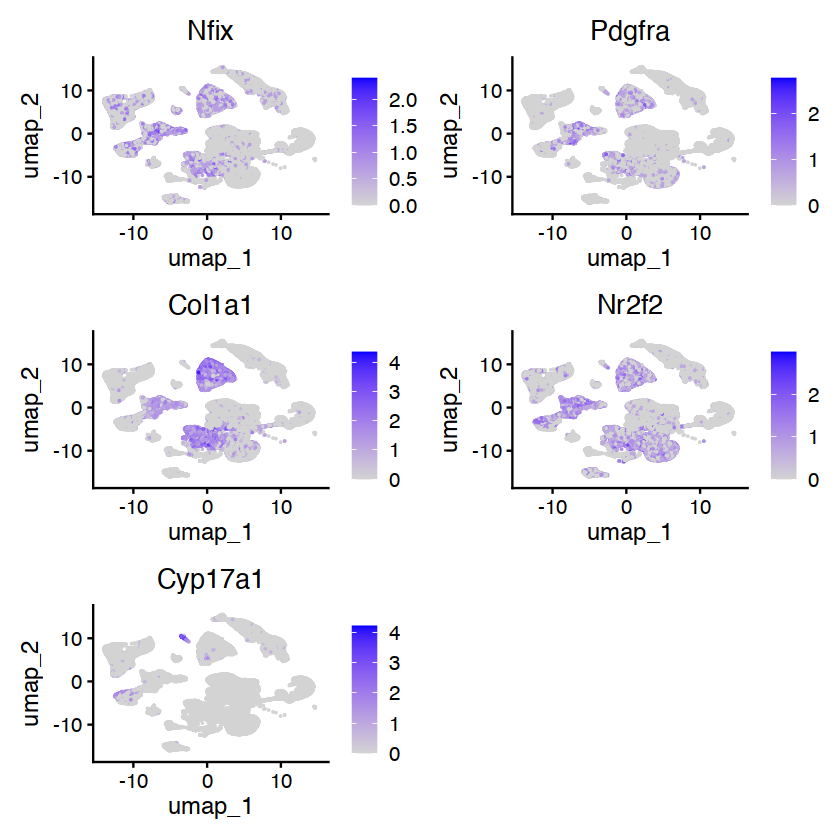

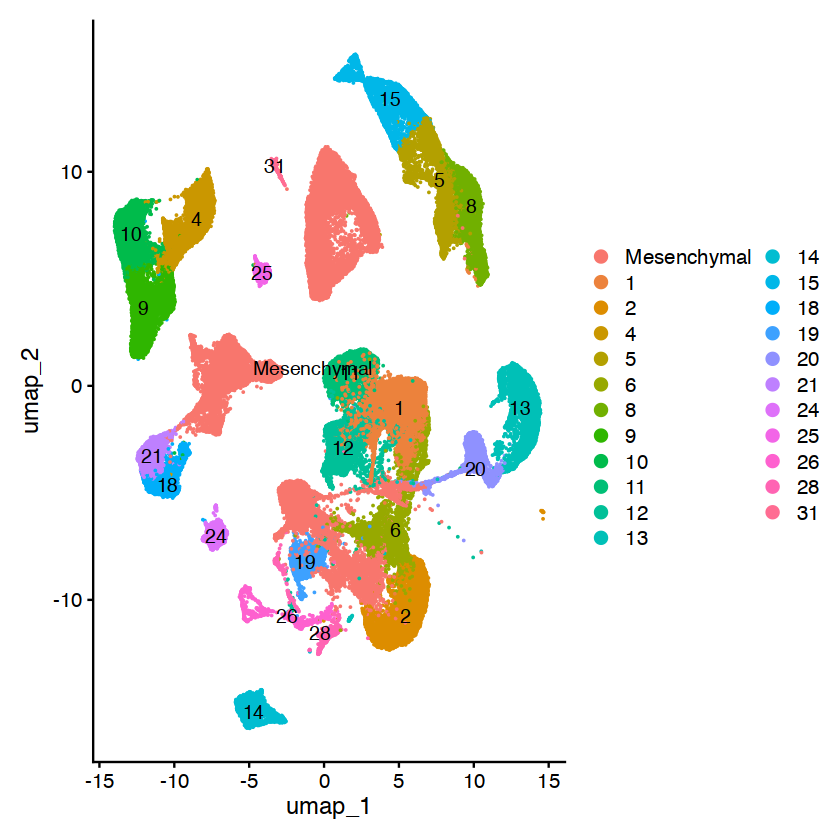

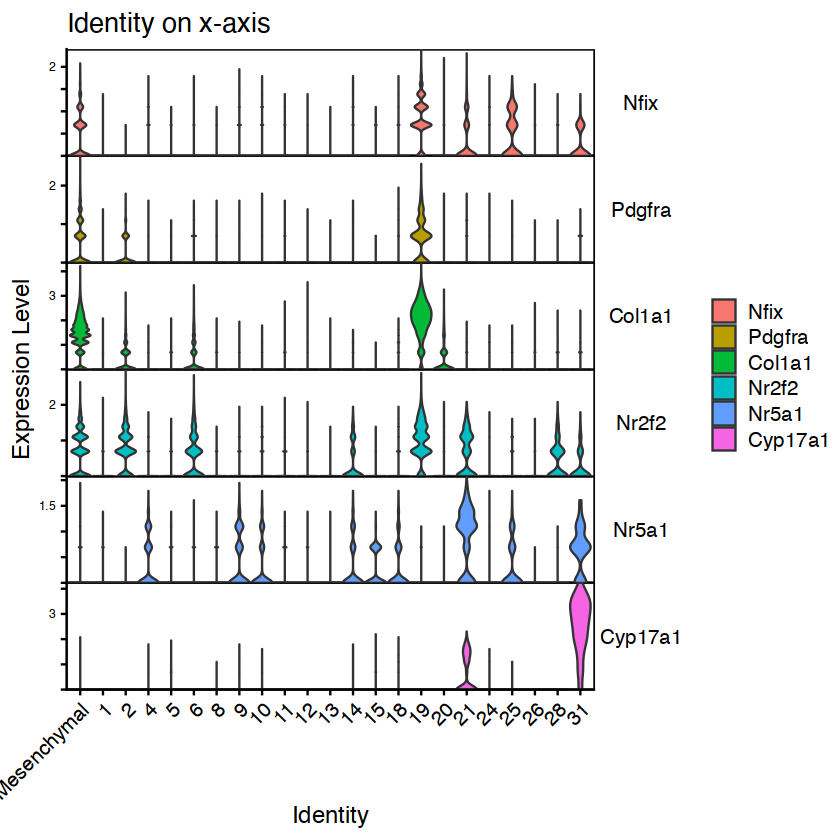

In [31]:
#Mesenchymal
FeaturePlot(pbmc, features = c("Nfix","Pdgfra","Col1a1","Nr2f2","Cyp17a1"),raster=FALSE)
DimPlot(pbmc, reduction = "umap", label =TRUE, raster=FALSE)
VlnPlot(pbmc, c("Nfix","Pdgfra","Col1a1","Nr2f2","Nr5a1","Cyp17a1"),   stack = TRUE, sort = FALSE, flip = TRUE) +
        theme(legend.position = "right") + ggtitle("Identity on x-axis")

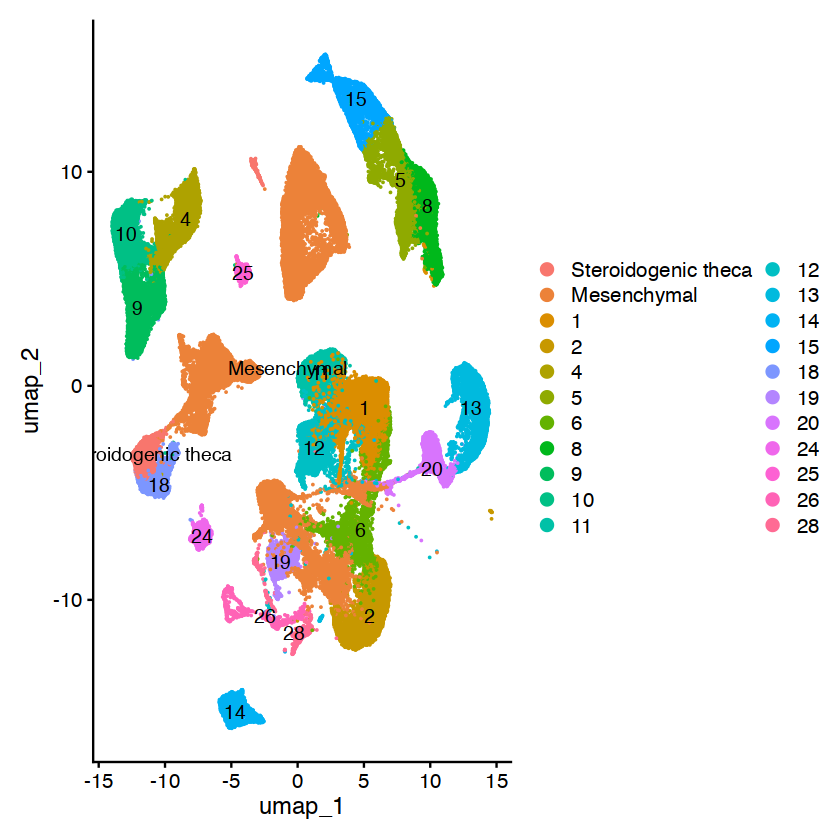

In [34]:
pbmc <- RenameIdents(pbmc, '21' = 'Steroidogenic theca','31' = 'Steroidogenic theca')
DimPlot(pbmc, reduction = "umap", label =TRUE, raster=FALSE)


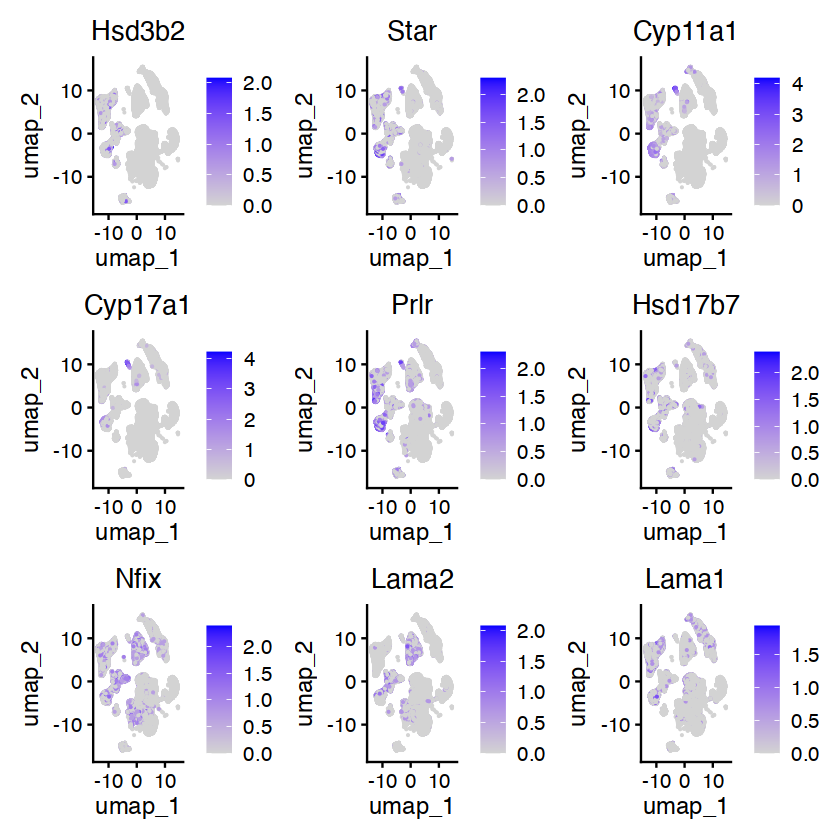

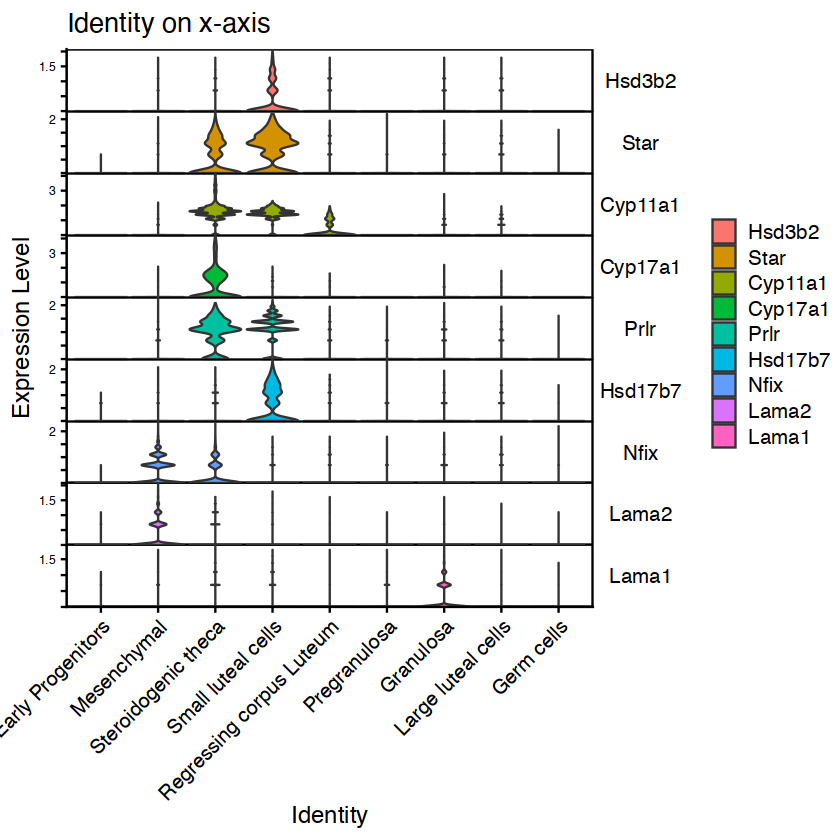

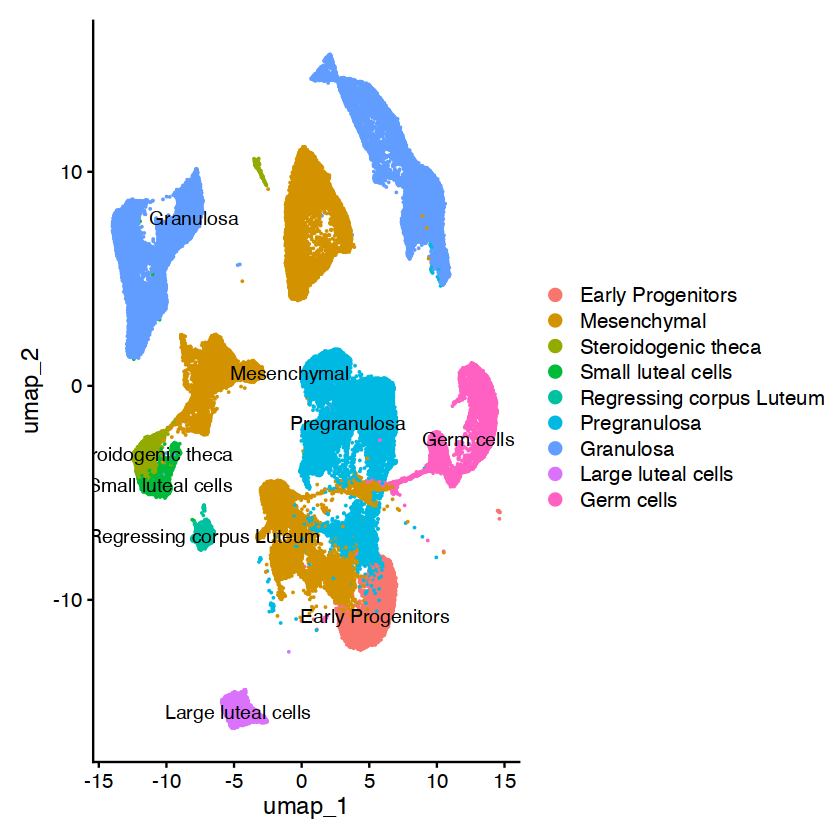

In [59]:
markerVLN <- c("Hsd3b2","Star","Cyp11a1","Cyp17a1","Prlr","Hsd17b7","Nfix","Lama2","Lama1")
FeaturePlot(pbmc, features = markerVLN, pt.size=0.1,raster=FALSE)
VlnPlot(pbmc, markerVLN,   stack = TRUE, sort = FALSE, flip = TRUE) +
        theme(legend.position = "right") + ggtitle("Identity on x-axis")
DimPlot(pbmc, reduction = "umap", label =TRUE, raster=FALSE)

In [37]:
pbmc <- RenameIdents(pbmc, '18' = 'Small luteal cells','24' = 'Regressing corpus Luteum',
                     '14' = 'Large luteal cells')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



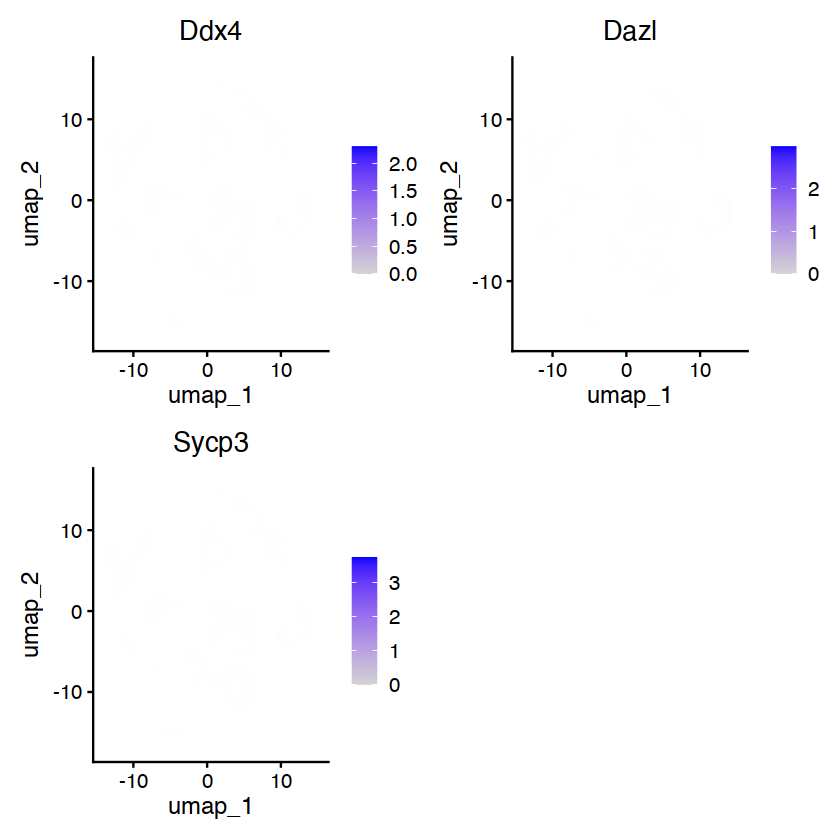

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



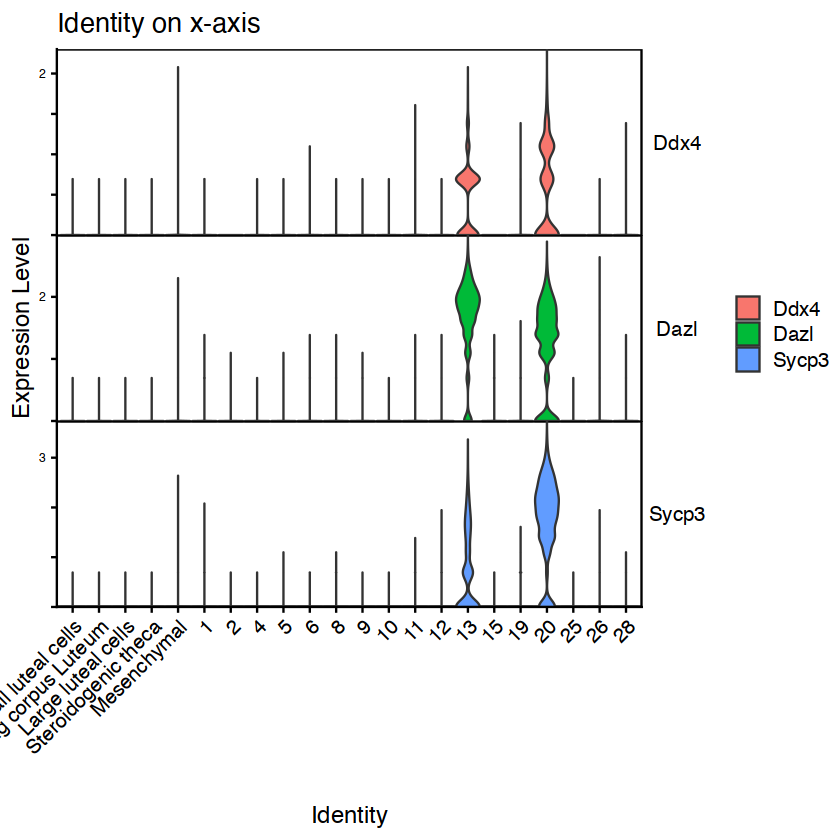

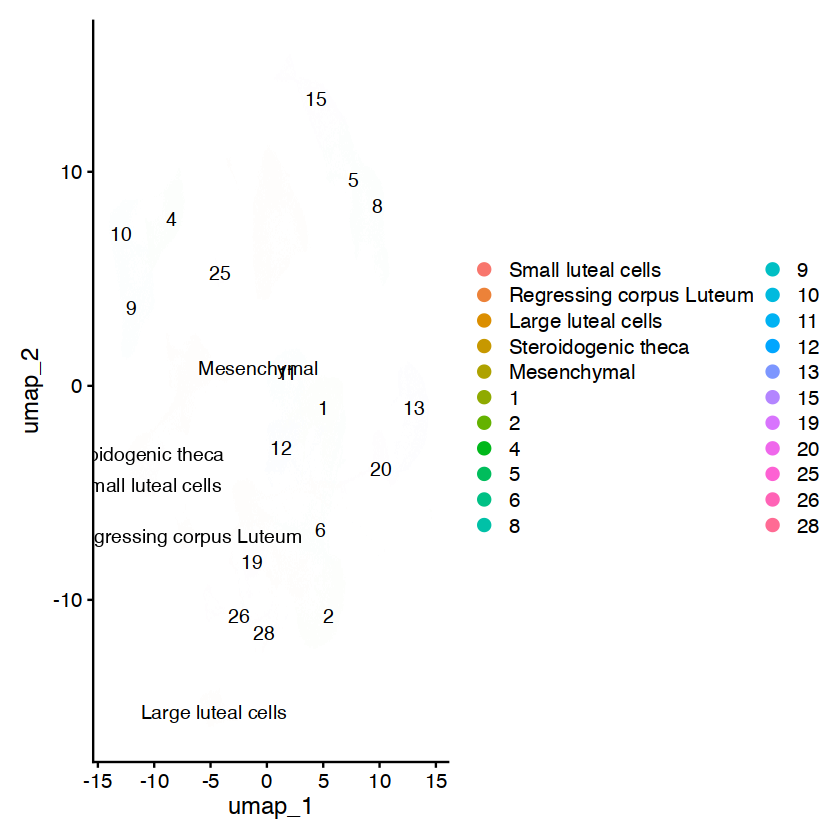

In [38]:
# Germ cells cluster
FeaturePlot(pbmc, features = c("Ddx4","Dazl","Sycp3"))

VlnPlot(pbmc, c("Ddx4","Dazl","Sycp3"),   stack = TRUE, sort = FALSE, flip = TRUE) +
        theme(legend.position = "right") + ggtitle("Identity on x-axis")
DimPlot(pbmc, reduction = "umap", label =TRUE)

In [39]:
pbmc <- RenameIdents(pbmc, '13' = 'Germ cells','20'='Germ cells')

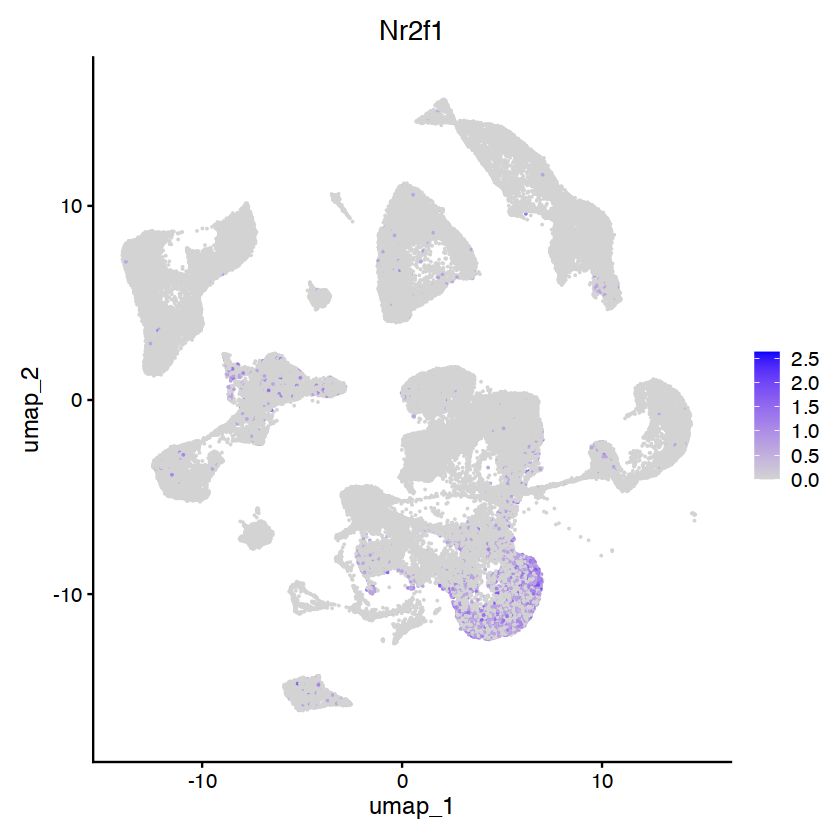

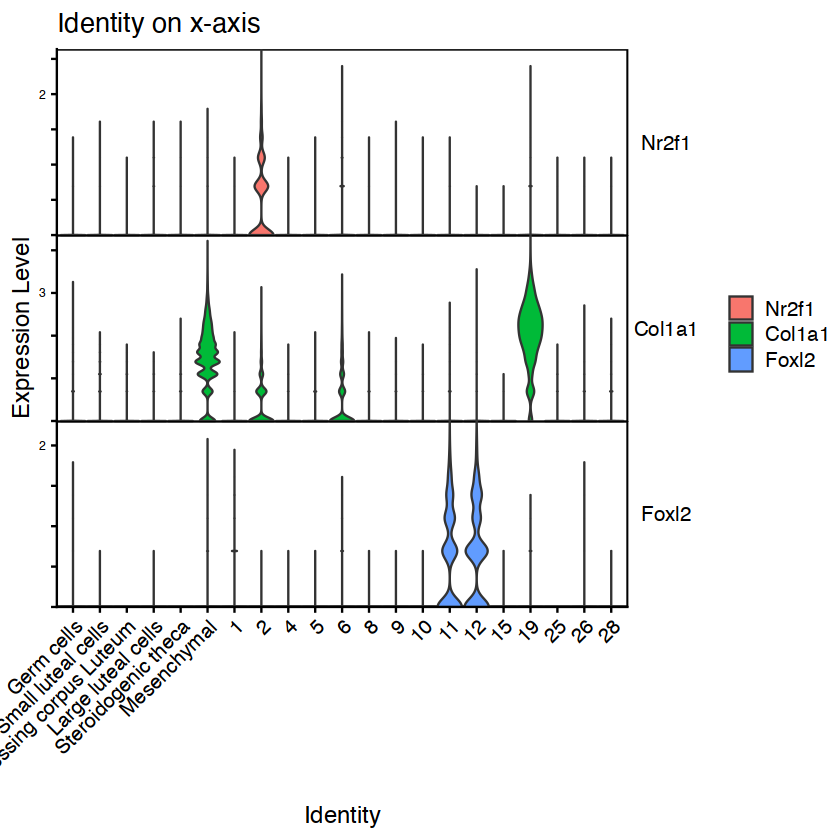

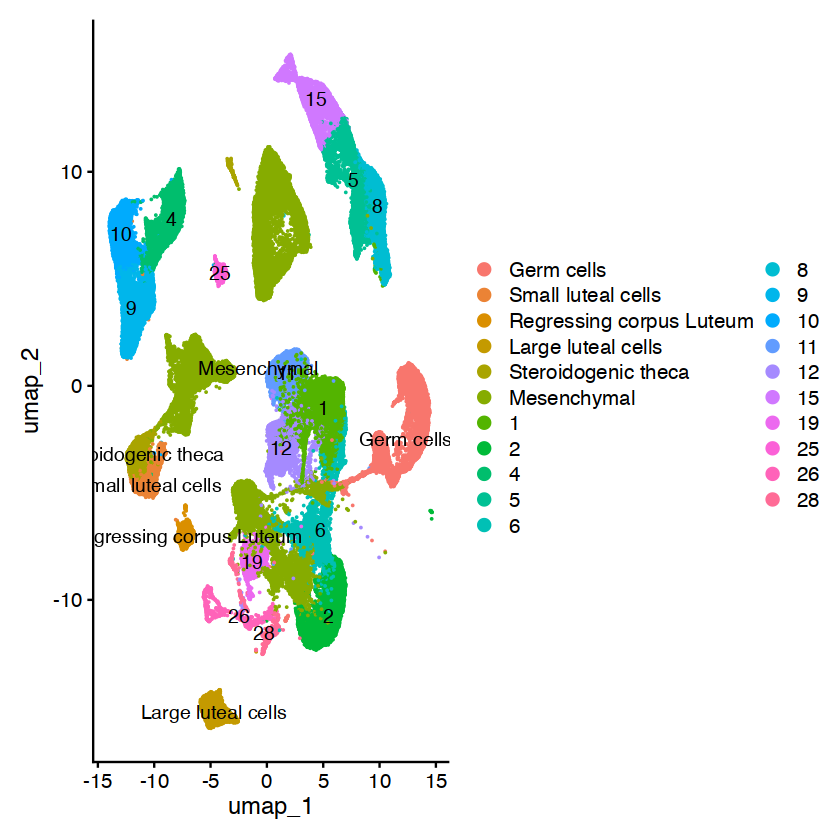

In [40]:
#Early Progenitors
FeaturePlot(pbmc, features = c("Nr2f1"),raster=FALSE)
VlnPlot(pbmc, c("Nr2f1","Col1a1","Foxl2"),   stack = TRUE, sort = FALSE, flip = TRUE) +
        theme(legend.position = "right") + ggtitle("Identity on x-axis")
DimPlot(pbmc, reduction = "umap", label =TRUE,raster=FALSE)

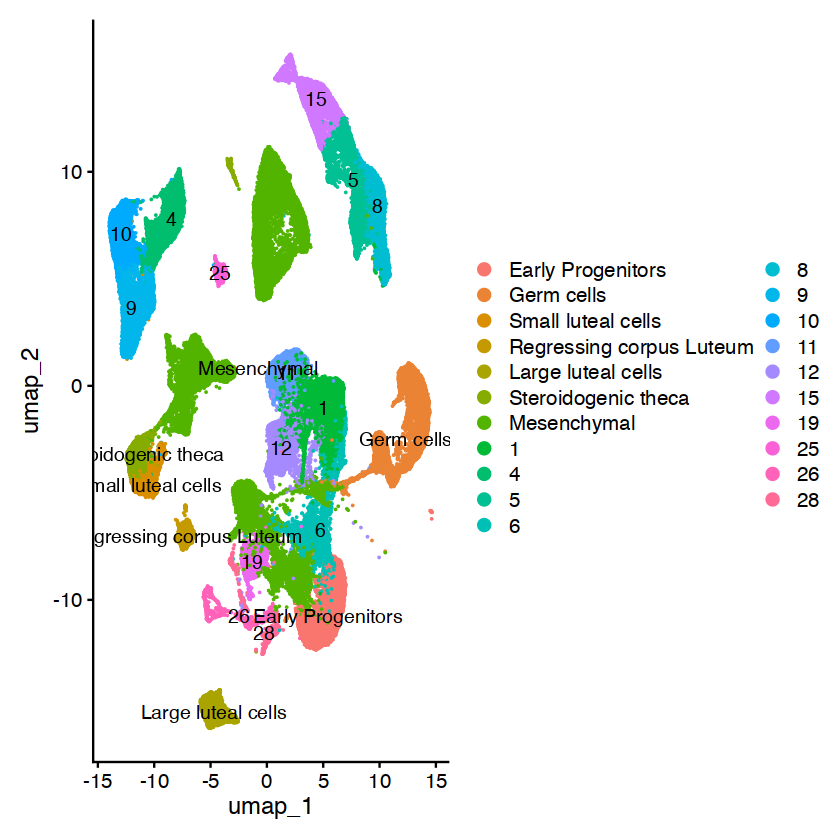

In [42]:
# Early Progenitors
pbmc <- RenameIdents(pbmc, '2' = 'Early Progenitors')
DimPlot(pbmc, reduction = "umap", label =TRUE,raster=FALSE)

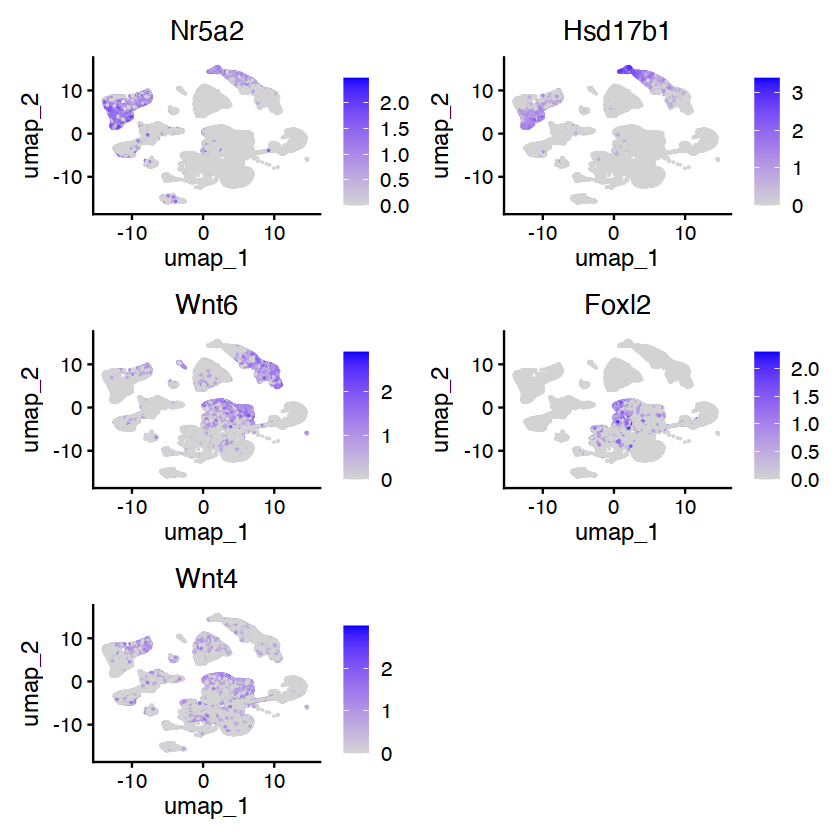

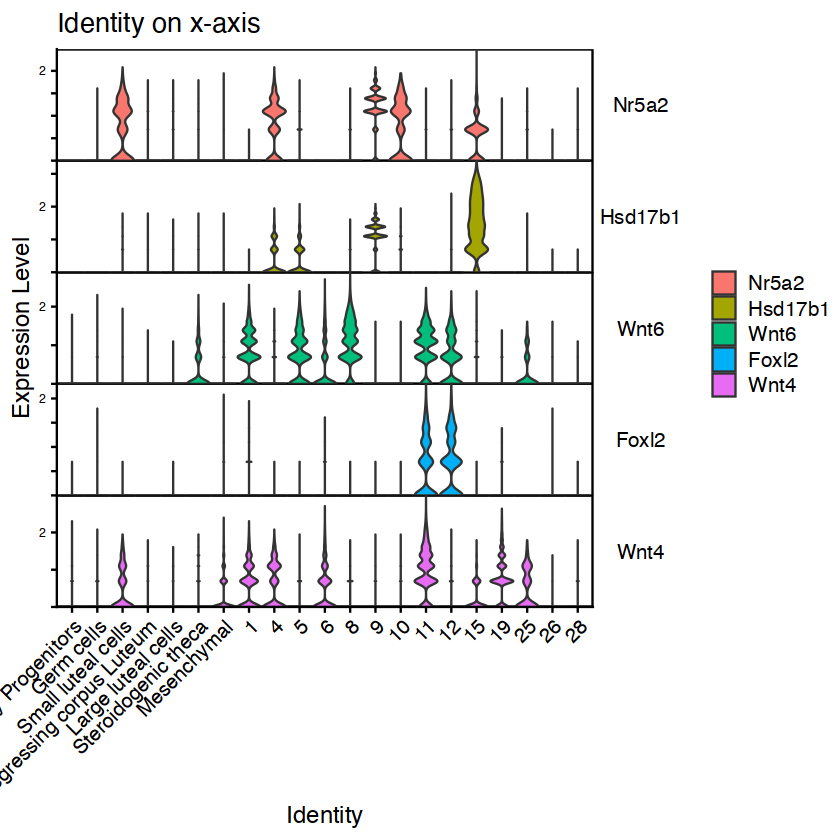

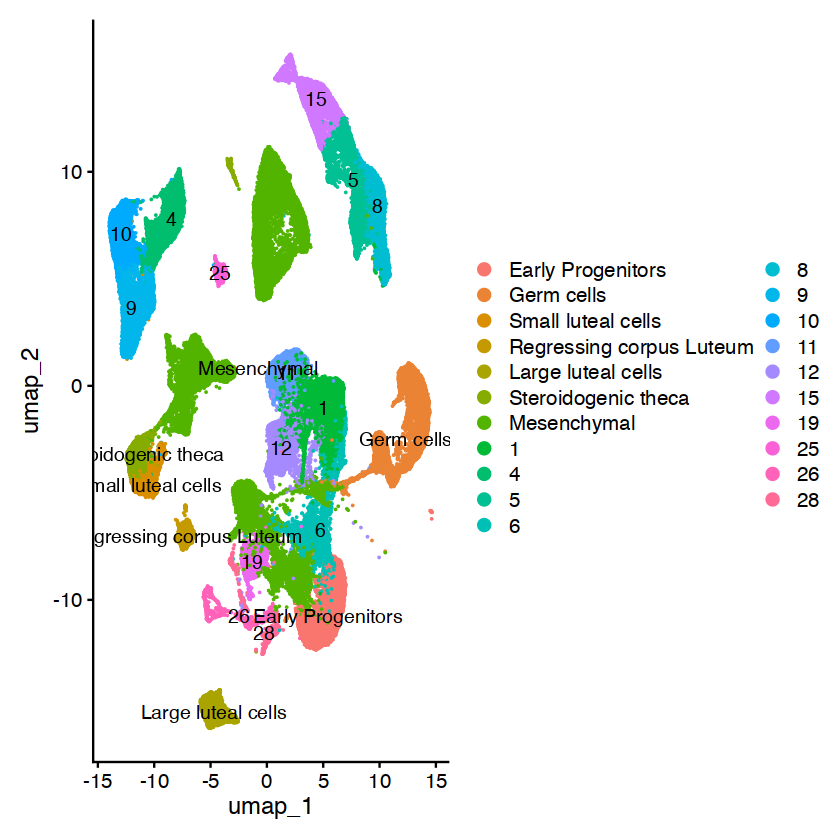

In [43]:
#PG
FeaturePlot(pbmc, features = c("Nr5a2","Hsd17b1","Wnt6","Foxl2","Wnt4"), raster=FALSE)

VlnPlot(pbmc, c("Nr5a2","Hsd17b1","Wnt6","Foxl2","Wnt4"),   stack = TRUE, sort = FALSE, flip = TRUE) +
        theme(legend.position = "right") + ggtitle("Identity on x-axis")
DimPlot(pbmc, reduction = "umap", label =TRUE, raster=FALSE)

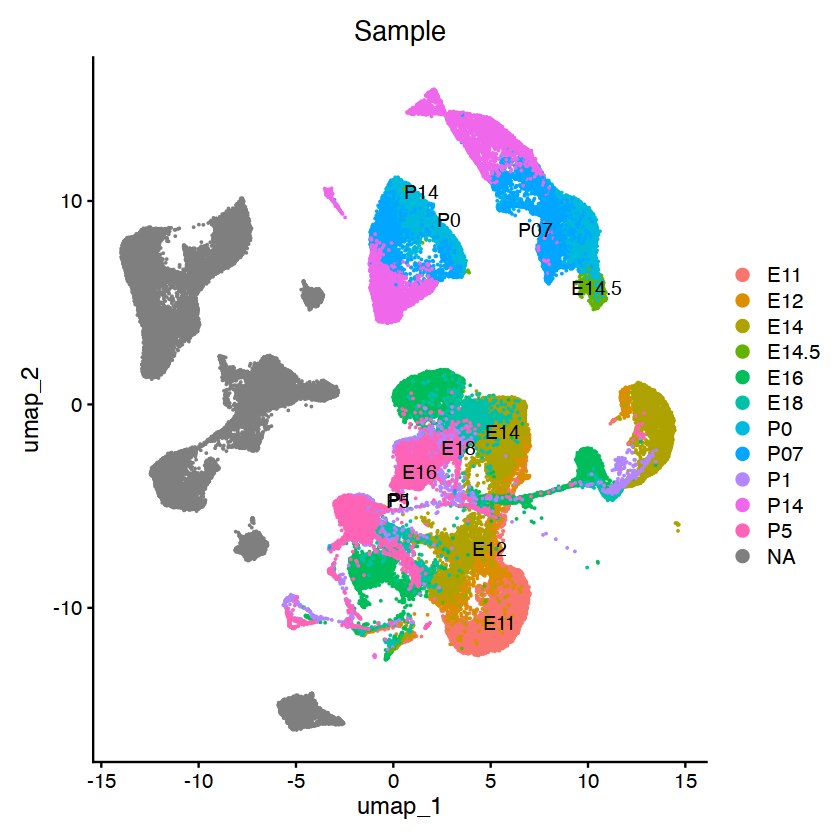

In [45]:
DimPlot(pbmc, reduction = "umap", label =TRUE, group.by = "Sample", raster=FALSE)

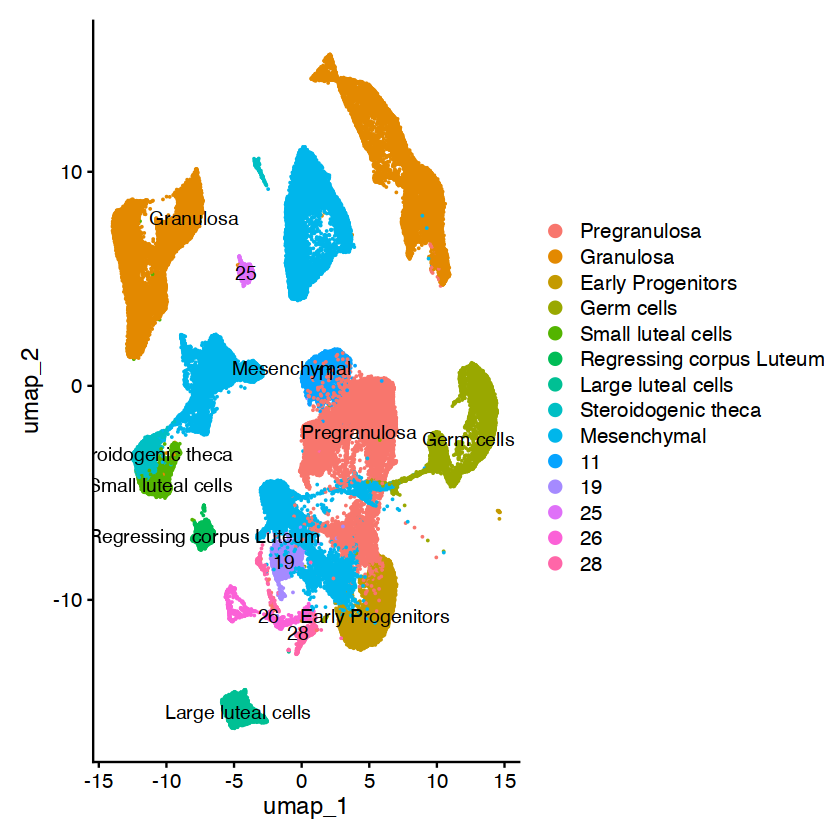

In [47]:
pbmc <- RenameIdents(pbmc, '12' = 'Pregranulosa', '6' = 'Pregranulosa','1' = 'Pregranulosa',
                                                '15' = 'Granulosa','4' = 'Granulosa','10' = 'Granulosa'
                                                ,'9' = 'Granulosa','5' = 'Granulosa','8' = 'Granulosa')
DimPlot(pbmc, reduction = "umap", label =TRUE,raster=FALSE)

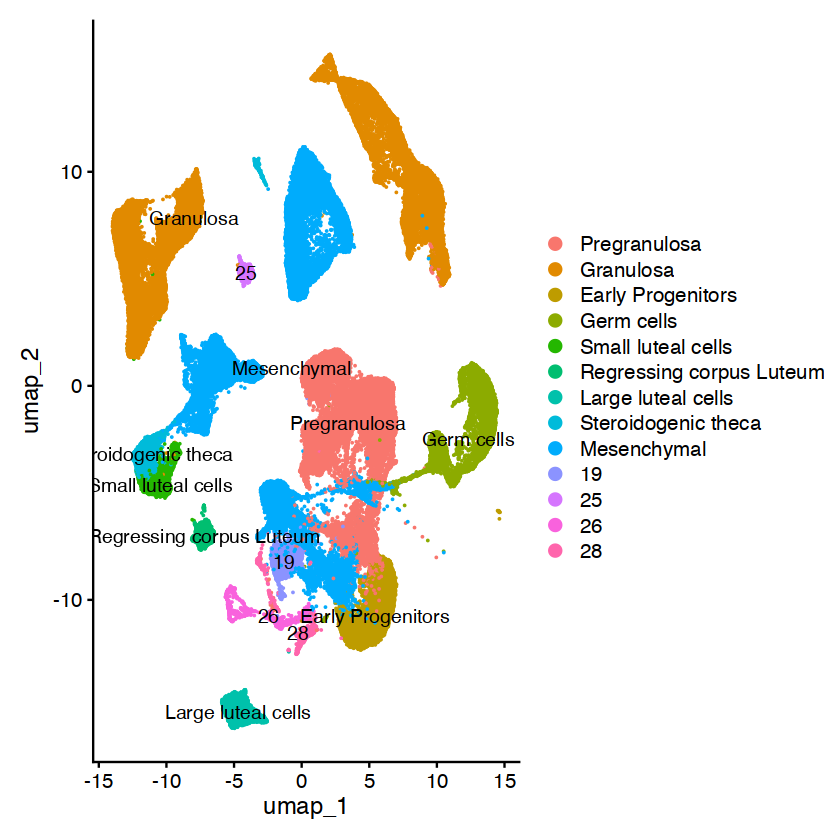

In [48]:
pbmc <- RenameIdents(pbmc, '11' = 'Pregranulosa')
DimPlot(pbmc, reduction = "umap", label =TRUE, raster=FALSE)

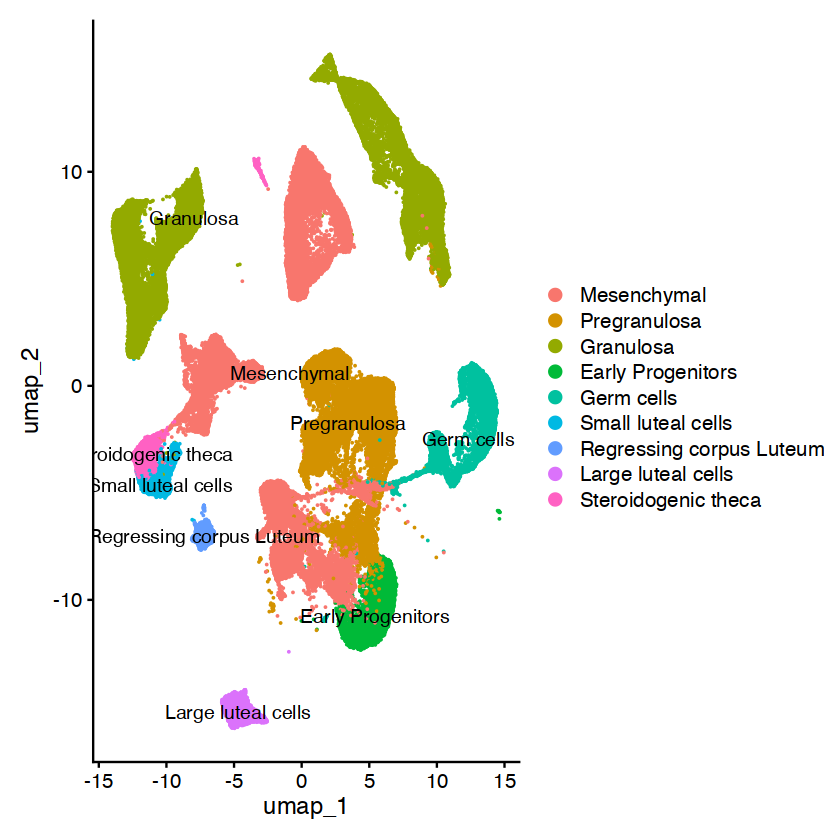

In [52]:
pbmc <- subset(pbmc, idents = c("26","25"), invert = TRUE)
DimPlot(pbmc, reduction = "umap", label =TRUE, raster=FALSE)

In [53]:
pbmc[["CellType"]] <- Idents(object = pbmc)

In [54]:
table(pbmc[["CellType"]])

CellType
             Mesenchymal             Pregranulosa                Granulosa 
                   30292                    20126                    27787 
       Early Progenitors               Germ cells       Small luteal cells 
                    7297                     5733                     2341 
Regressing corpus Luteum       Large luteal cells      Steroidogenic theca 
                    1275                     3018                     2154 

In [55]:
newLevels = c('Early Progenitors','Mesenchymal','Steroidogenic theca','Small luteal cells',
              'Regressing corpus Luteum','Pregranulosa','Granulosa','Large luteal cells',
              'Germ cells'
   
              )
Idents(pbmc) <- factor(x = Idents(pbmc), levels = newLevels)

In [67]:
pbmc <- subset(pbmc, idents = c("Regressing corpus Luteum","Large luteal cells"), invert = TRUE)

In [68]:
pbmc <-  RenameIdents(pbmc, "Small luteal cells" = "Luteal Cells" )

In [64]:
colnames( pbmc[[]])

[1] "orig.ident"       "nCount_RNA"       "nFeature_RNA"     "Sample"          
 [5] "nCount_SCT"       "nFeature_SCT"     "X"                "x"               
 [9] "SCT_snn_res.0.5"  "seurat_clusters"  "nGene"            "nUMI"            
[13] "batch"            "fraction.mito"    "condition"        "dominant_index"  
[17] "percent_dominant" "Level0"           "doubletSimScore"  "doubletSimCall"  
[21] "mouse"            "Level1"           "Level2"           "Louvain"         
[25] "CellTypesAdult"   "CellType"

In [2]:
DimPlot(pbmc, reduction = "umap", label =TRUE, raster=FALSE, group.by = "Level0" )

ERROR: Error in DimPlot(pbmc, reduction = "umap", label = TRUE, raster = FALSE, : could not find function "DimPlot"


In [70]:
newLevels = c('Early Progenitors','Mesenchymal','Steroidogenic theca','Luteal Cells',
              'Pregranulosa','Granulosa',
              'Germ cells'
   
              )
Idents(pbmc) <- factor(x = Idents(pbmc), levels = newLevels)

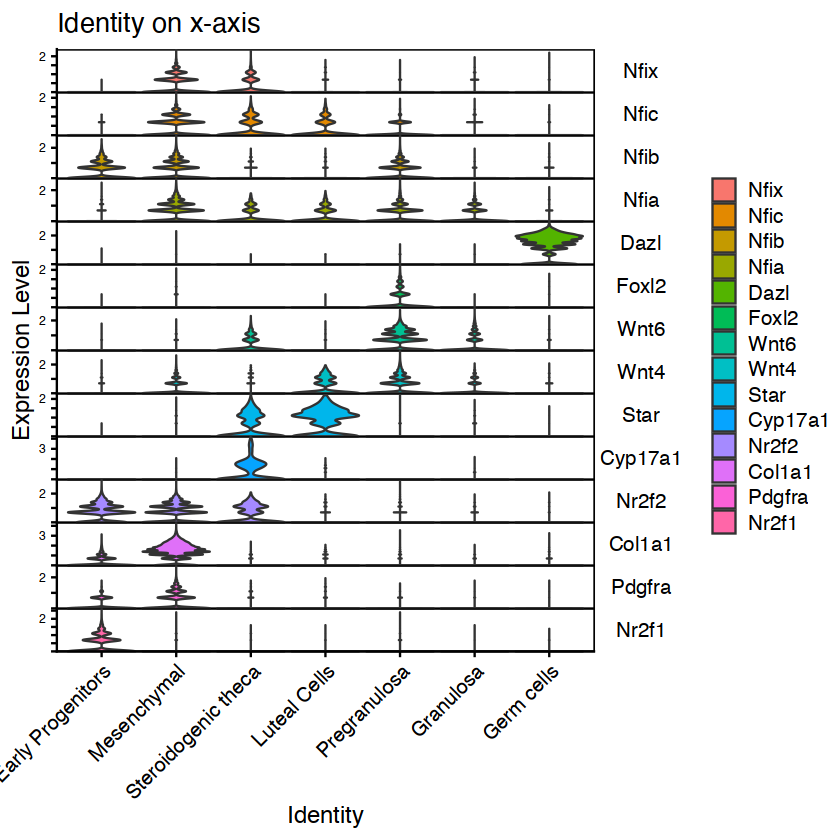

In [11]:
VlnPlot(pbmc, c(
                "Nfix","Nfic","Nfib","Nfia",
                "Dazl","Foxl2","Wnt6","Wnt4",
                "Star","Cyp17a1",
                "Nr2f2","Col1a1","Pdgfra","Nr2f1"
               
               ),  stack = TRUE, sort = FALSE, flip = TRUE) +
        theme(legend.position = "right") + ggtitle("Identity on x-axis")

In [72]:
pbmc[["CellType"]] <- Idents(object = pbmc)

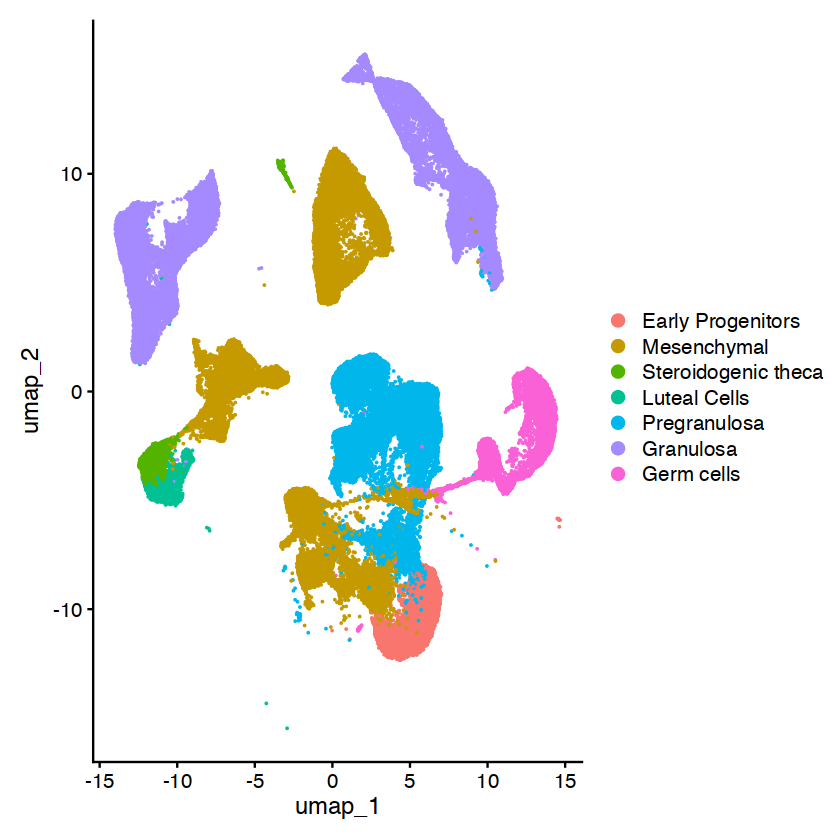

In [12]:
DimPlot(pbmc, reduction = "umap")

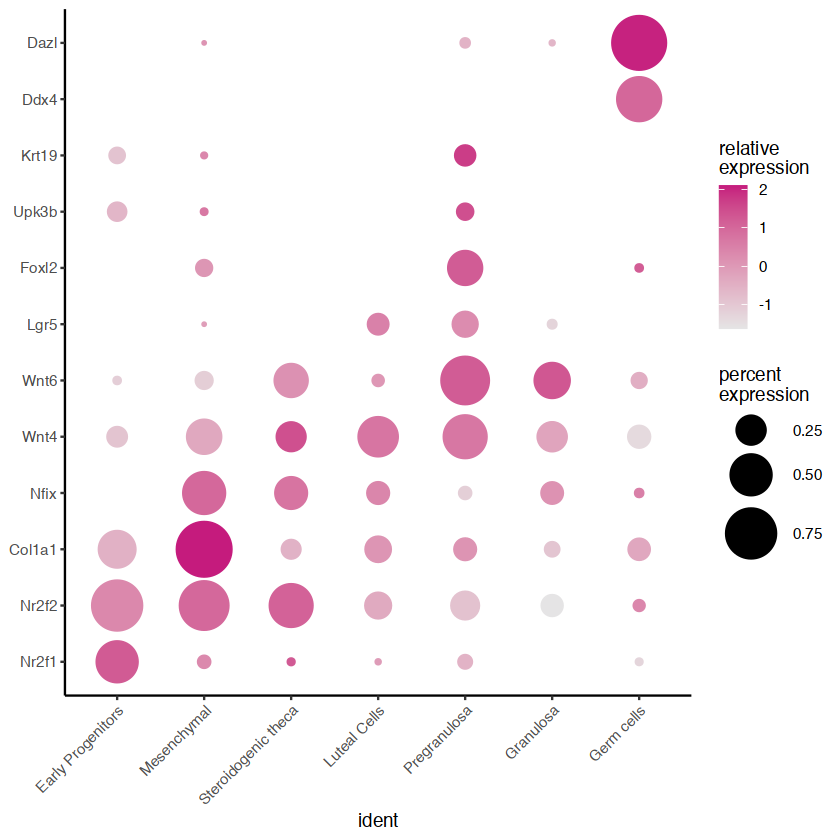

In [6]:
library(dittoSeq)
your_markers <- c('Nr2f1','Nr2f2','Col1a1','Nfix','Wnt4','Wnt6','Lgr5','Foxl2','Upk3b','Krt19','Ddx4','Dazl')
dittoDotPlot(pbmc, your_markers, group.by = "ident",size = 15) + coord_flip()

In [3]:
#save(pbmc, file = "data/ovaryP1-P14-Adult.Rdata")
load("data/ovaryP1-P14-Adult.Rdata")

Warning message in readChar(con, 5L, useBytes = TRUE):
“cannot open compressed file 'data/ovaryP1-P14-Adult.Rdata', probable reason 'No such file or directory'”


ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


In [21]:
pbmc <- SCTransform(pbmc, ncells = 3000 )
pbmc <- RunPCA(pbmc)
pbmc <- RunUMAP(pbmc, dims = 1:20)
pbmc <- FindNeighbors(pbmc, reduction = "pca", dims = 1:20)
pbmc <- FindClusters(pbmc, resolution = 0.6)

Running SCTransform on assay: SCT

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Total Step 1 genes: 12067

Total overdispersed genes: 11197

Excluding 870 genes from Step 1 because they are not overdispersed.

Variance stabilizing transformation of count matrix of size 13499 by 95730

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3000 cells



  |======================================================================| 100%


Setting estimate of  274 genes to inf as theta_mm/theta_mle < 1e-3

# of step1 poisson genes (variance < mean): 0

# of low mean genes (mean < 0.001): 1133

Total # of Step1 poisson genes (theta=Inf; variance < mean): 276

Total # of poisson genes (theta=Inf; variance < mean): 2171

Calling offset model for all 2171 poisson genes

Found 332 outliers - those will be ignored in fitting/regularization step


Ignoring theta inf genes

Replacing fit params for 2171 poisson genes by theta=Inf

Setting min_variance based on median UMI:  0.04

Second step: Get residuals using fitted parameters for 13499 genes



  |======================================================================| 100%


Computing corrected count matrix for 13499 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 9.970612 mins

Determine variable features

Centering data matrix

Place corrected count matrix in counts slot

Warning message:
“Different cells and/or features from existing assay SCT”
Set default assay to SCT

PC_ 1 
Positive:  Hsd3b1, Inha, Gm17541, Gja1, Foxo1, Cyp11a1, Nr5a2, Prkar2b, Nkain3, Wbp5 
	   Acsbg1, Sema5a, Ephx2, Mgarp, Nap1l5, Ttf1, Heph, Socs2, Gm9493, Nme2 
	   Hsd17b1, Prlr, Bmpr2, Thbs1, Sfrp4, Atp6v0c, Scarb1, Grb14, Gm4076, Inhba 
Negative:  Hbb-bs, Hsp90aa1, Fau, Hba-a1, Tmsb4x, Hbb-bt, Smc1b, Ftl1, Cdkn1c, Hba-a2 
	   Ubb, Actb, Hmgb2, Ptma, Tmsb10, Hsp90ab1, Lgals7, Ptn, Lgals1, Dazl 
	   Stra8, Eef1a1, H2afz, Sycp1, Npm1, Cox7c, Cfl1, Ppia, Sycp3, Ifitm1 
PC_ 2 
Positive:  Dcn, Igfbp7, Col1a2, Mfap4, Col1a1, Mgp, Col3a1, Sparc, Acta2, Dlk1 
	   eGFP, Bgn, Ptn, Junb, Lum, Sparcl1, Sfrp1, Lgals1, Cyr61, Fos 
	   Mfap2, Socs3, Igfbp4, Lsp1, Cygb, Itm2a, Itih5, Ier2, Mdk, Tcf21 
Negative:  Smc1b

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 95730
Number of edges: 3232595

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9538
Number of communities: 31
Elapsed time: 27 seconds


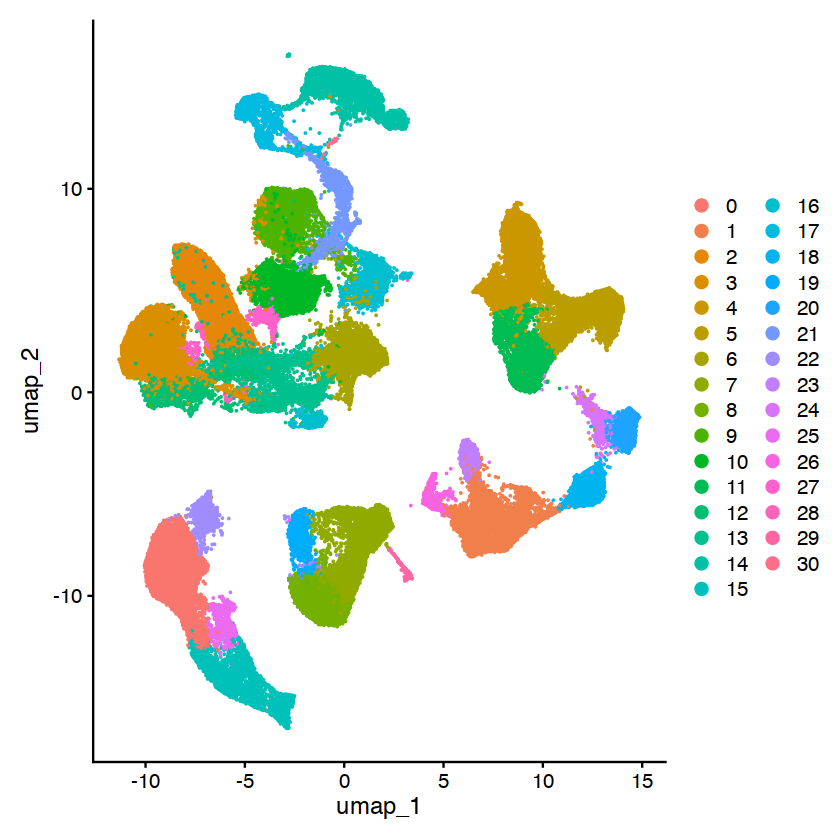

In [22]:
DimPlot(pbmc, reduction = "umap")

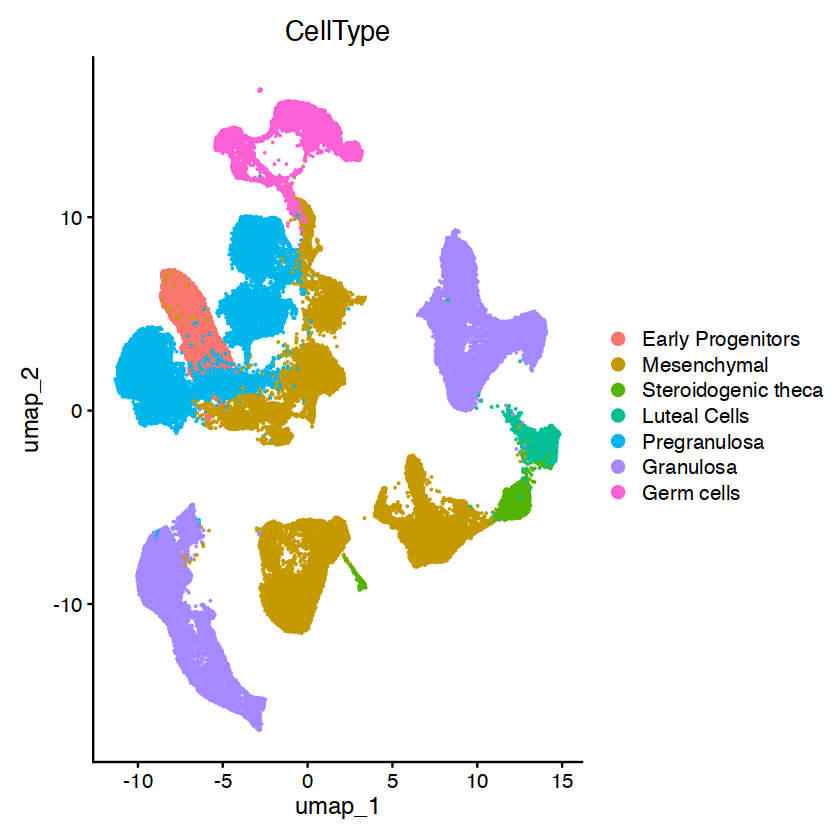

In [24]:
DimPlot(pbmc, reduction = "umap", group.by = "CellType") 

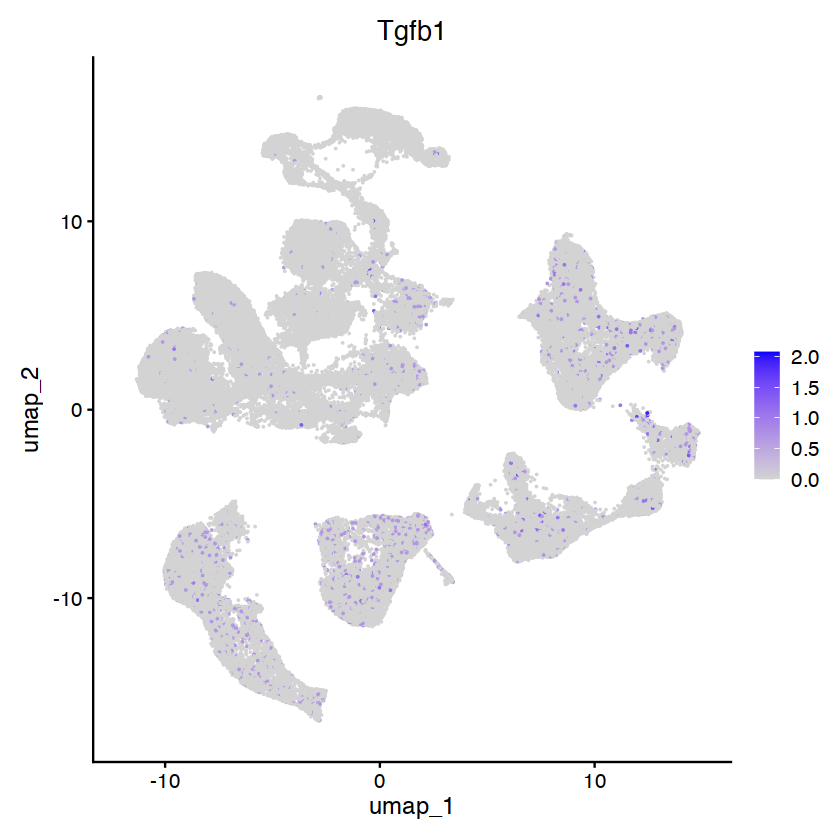

In [26]:
FeaturePlot(pbmc, features = "Tgfb1")

In [ ]:
########################################################################
###################################

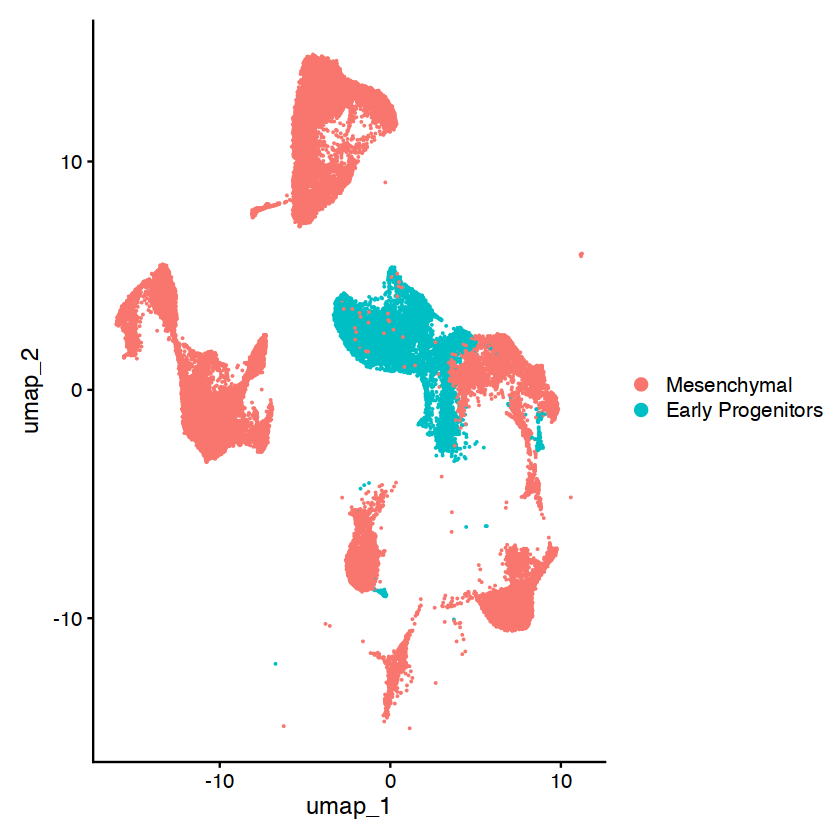

In [270]:
# subset mesenchymal
pbmcM = subset(pbmc, idents = c('Early Progenitors','Mesenchymal'))
DimPlot(pbmcM, reduction = "umap")

In [271]:
pbmcM

An object of class Seurat 
36767 features across 46417 samples within 2 assays 
Active assay: SCT (17370 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [272]:
pbmcM <- SCTransform(pbmcM, ncells = 3000 )
pbmcM <- RunPCA(pbmcM, features = VariableFeatures(object = pbmcM))
pbmcM <- RunUMAP(pbmcM, dims = 1:20)
pbmcM <- FindNeighbors(pbmcM, reduction = "pca", dims = 1:20)
pbmcM <- FindClusters(pbmcM, resolution = 0.6)

Running SCTransform on assay: SCT

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Total Step 1 genes: 12436

Total overdispersed genes: 12340

Excluding 96 genes from Step 1 because they are not overdispersed.

Variance stabilizing transformation of count matrix of size 13763 by 46417

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3000 cells



  |======================================================================| 100%


Setting estimate of  210 genes to inf as theta_mm/theta_mle < 1e-3

# of step1 poisson genes (variance < mean): 0

# of low mean genes (mean < 0.001): 1127

Total # of Step1 poisson genes (theta=Inf; variance < mean): 216

Total # of poisson genes (theta=Inf; variance < mean): 1236

Calling offset model for all 1236 poisson genes

Found 240 outliers - those will be ignored in fitting/regularization step


Ignoring theta inf genes

Replacing fit params for 1236 poisson genes by theta=Inf

Setting min_variance based on median UMI:  0.04

Second step: Get residuals using fitted parameters for 13763 genes



  |======================================================================| 100%


Computing corrected count matrix for 13763 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.526706 mins

Determine variable features

Centering data matrix

Place corrected count matrix in counts slot

Warning message:
“Different cells and/or features from existing assay SCT”
Set default assay to SCT

PC_ 1 
Positive:  Hsd3b1, Cyp11a1, Gm17541, Sfrp4, Cpe, Acsbg1, Aldh1a1, Smoc2, Prlr, C1s1 
	   Mgarp, Serinc3, Star, Ttf1, Gm4076, Akr1cl, Scarb1, Atp6v0c, Gja1, Gstm1 
	   Nkain3, Gm9493, Me1, Col4a1, Thbs1, Ephx2, Cxcl14, Ogn, Nme2, Col4a2 
Negative:  Actb, Ptma, Fau, Ftl1, Ptn, Tmsb10, H2afz, Ubb, Hbb-bs, H3f3b 
	   Dlk1, Hmgb1, Eef1a1, Hmgb2, Tmsb4x, eGFP, Hsp90ab1, Ppia, Cdkn1c, Cyr61 
	   Hmga2, Mdk, Tpt1, Npm1, Hmgn2, Tubb5, Stmn1, Igfbp5, Mfap4, Lgals1 
PC_ 2 
Positive:  eGFP, Igfbp7, Dcn, Fos, Junb, Gnb2l1, Mfap4, Mgp, Sparc, Gm10709 
	   Ier2, Col1a2, Cyr61, Gm8730, Sepw1, Socs3, Lgals1, Wbp5, Col1a1, Btg2 
	   Tceb2, Mfap2, Egr1, Col3a1, Acta2, Bgn, Gas6, 2700060E02Rik, Lum, Atp5o 
Negative:  Hmga2,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 46417
Number of edges: 1576447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9400
Number of communities: 28
Elapsed time: 10 seconds


In [282]:
pbmcM[["Louvain"]] <- Idents(object = pbmcM)

In [285]:
Idents(object = pbmcM) <- "Sample"

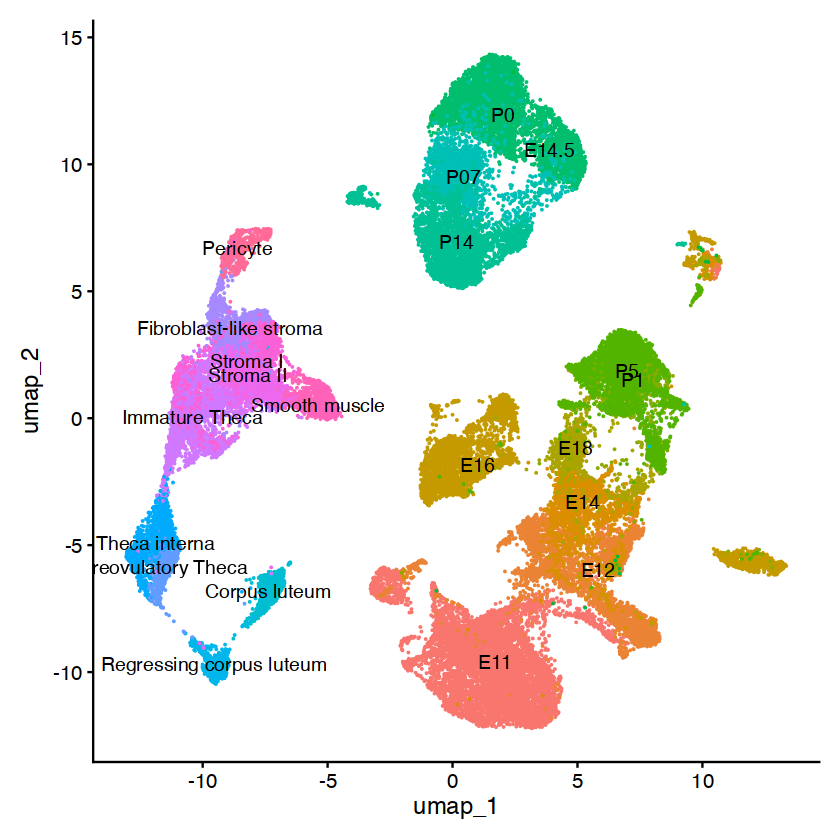

In [287]:

DimPlot(pbmcM, reduction = "umap", label = TRUE) + NoLegend()

In [288]:
table(pbmcM[["Sample"]])

Sample
           Corpus luteum                      E11                      E12 
                     664                     7700                     3889 
                     E14                    E14.5                      E16 
                    2044                       69                     4025 
                     E18   Fibroblast-like stroma           Immature Theca 
                     990                     1467                     2485 
                      P0                      P07                       P1 
                    5580                     2041                     2080 
                     P14                       P5                 Pericyte 
                    3127                     2742                      682 
      Preovulatory Theca Regressing corpus luteum            Smooth muscle 
                     631                      642                     1070 
                Stroma I                Stroma II            Theca interna 
     

In [289]:
pbmcM <- subset(pbmcM, idents = c("E14.5","P0"), invert = TRUE)

In [290]:
Idents(object = pbmcM) <- "Louvain"

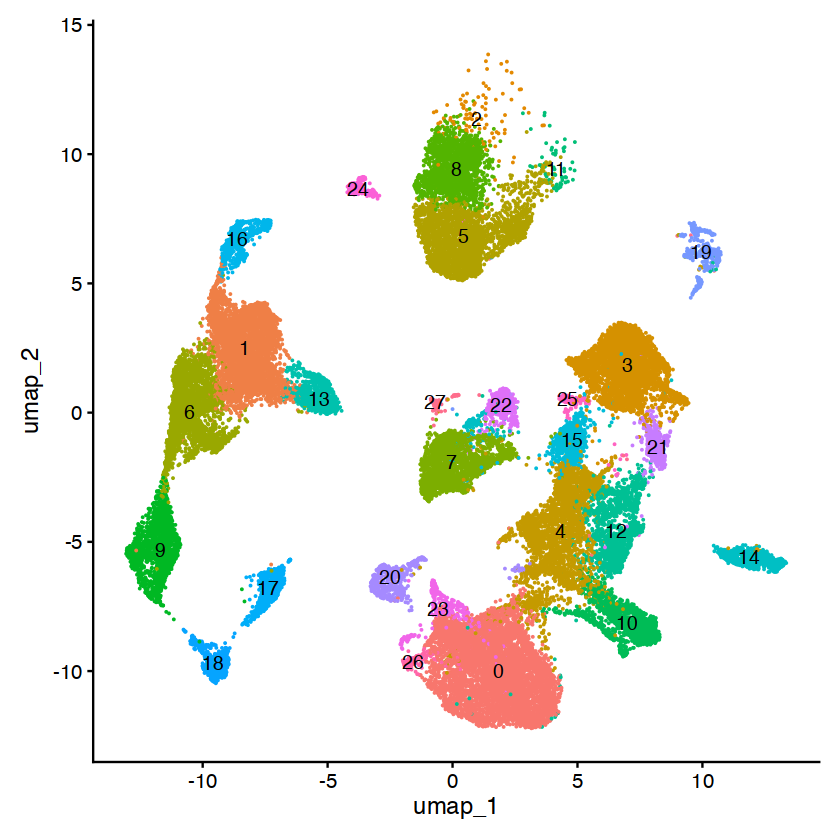

In [291]:
DimPlot(pbmcM, reduction = "umap", label = TRUE) + NoLegend()

In [292]:
pbmcM <- subset(pbmcM, idents = c("19","14"), invert = TRUE)

In [294]:
pbmcM <- SCTransform(pbmcM, ncells = 3000 )
pbmcM <- RunPCA(pbmcM, features = VariableFeatures(object = pbmcM))
pbmcM <- RunUMAP(pbmcM, dims = 1:20)
pbmcM <- FindNeighbors(pbmcM, reduction = "pca", dims = 1:20)
pbmcM <- FindClusters(pbmcM, resolution = 0.6)

Running SCTransform on assay: SCT

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Total Step 1 genes: 11908

Total overdispersed genes: 11392

Excluding 516 genes from Step 1 because they are not overdispersed.

Variance stabilizing transformation of count matrix of size 12258 by 39278

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3000 cells



  |======================================================================| 100%


Setting estimate of  193 genes to inf as theta_mm/theta_mle < 1e-3

# of step1 poisson genes (variance < mean): 0

# of low mean genes (mean < 0.001): 327

Total # of Step1 poisson genes (theta=Inf; variance < mean): 193

Total # of poisson genes (theta=Inf; variance < mean): 862

Calling offset model for all 862 poisson genes

Found 244 outliers - those will be ignored in fitting/regularization step


Ignoring theta inf genes

Replacing fit params for 862 poisson genes by theta=Inf

Setting min_variance based on median UMI:  0.04

Second step: Get residuals using fitted parameters for 12258 genes



  |======================================================================| 100%


Computing corrected count matrix for 12258 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.48412 mins

Determine variable features

Centering data matrix

Place corrected count matrix in counts slot

Warning message:
“Different cells and/or features from existing assay SCT”
Set default assay to SCT

PC_ 1 
Positive:  Hsd3b1, Cyp11a1, Gm17541, Wbp5, Serinc3, Igfbp7, Akr1cl, Aldh1a1, Cpe, Sfrp4 
	   Acsbg1, Smoc2, Gstm1, Prlr, Mgarp, C1s1, Thbs1, Scarb1, Star, Ogn 
	   Nme2, Col4a1, Me1, Gja1, Gm4076, Fdx1, Ttf1, Cxcl14, Nkain3, Sep15 
Negative:  Ptn, Fau, Cdkn1c, H2afz, Hmga2, Ptma, Tmsb10, Hmgb2, Actb, Igfbp5 
	   Ftl1, Hbb-bs, Dlk1, Peg3, Stmn1, Hmgn2, Mdk, Ubb, Hmgb1, Hsp90ab1 
	   Mest, Tmsb4x, Npm1, Hbb-y, Sox11, Cfl1, Hsp90aa1, Tubb5, Ranbp1, 2010107E04Rik 
PC_ 2 
Positive:  Igfbp7, eGFP, Gnb2l1, Dcn, Fos, Junb, Mgp, Gm10709, Gm8730, Mfap4 
	   Sparc, Col1a2, Sepw1, Ier2, Lgals1, Col1a1, Col3a1, Socs3, Acta2, 2700060E02Rik 
	   Mfap2, Btg2, Fau, Igfbp6, Jun, Egr1, Hbb-bs, Sepp1, Tceb2, Fosb 
Negative: 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 39278
Number of edges: 1345265

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9349
Number of communities: 25
Elapsed time: 8 seconds


In [306]:
pbmcM <- FindClusters(pbmcM, resolution = 1.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 39278
Number of edges: 1345265

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9048
Number of communities: 34
Elapsed time: 9 seconds


In [322]:
#save(pbmcM, file = "data/MesenchymalP1-P14-Adult.Rdata")
load(file = "data/MesenchymalP1-P14-Adult.Rdata")

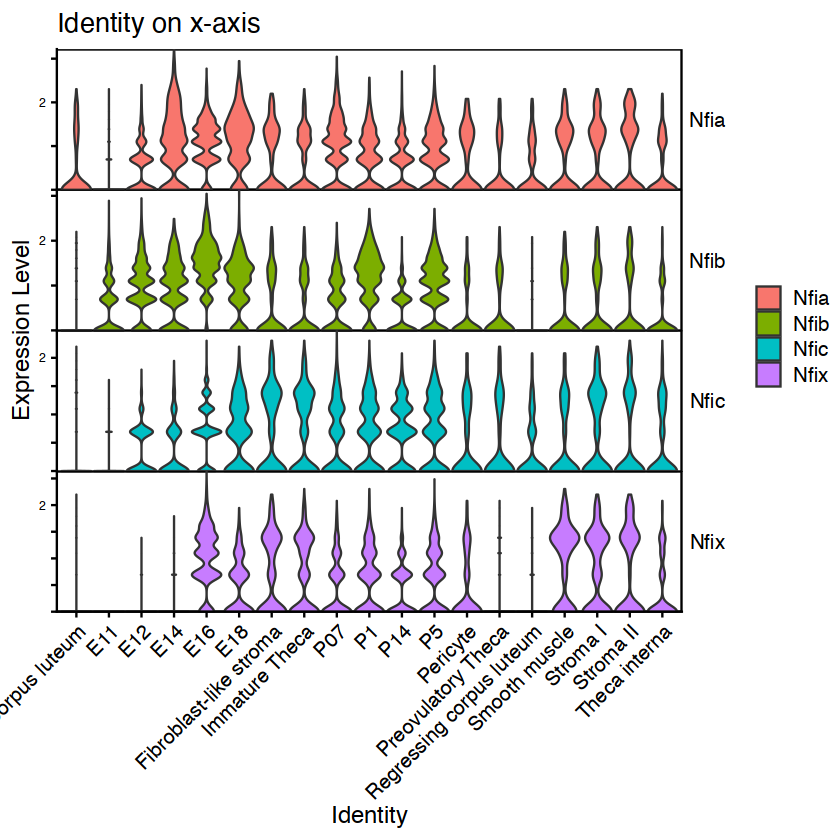

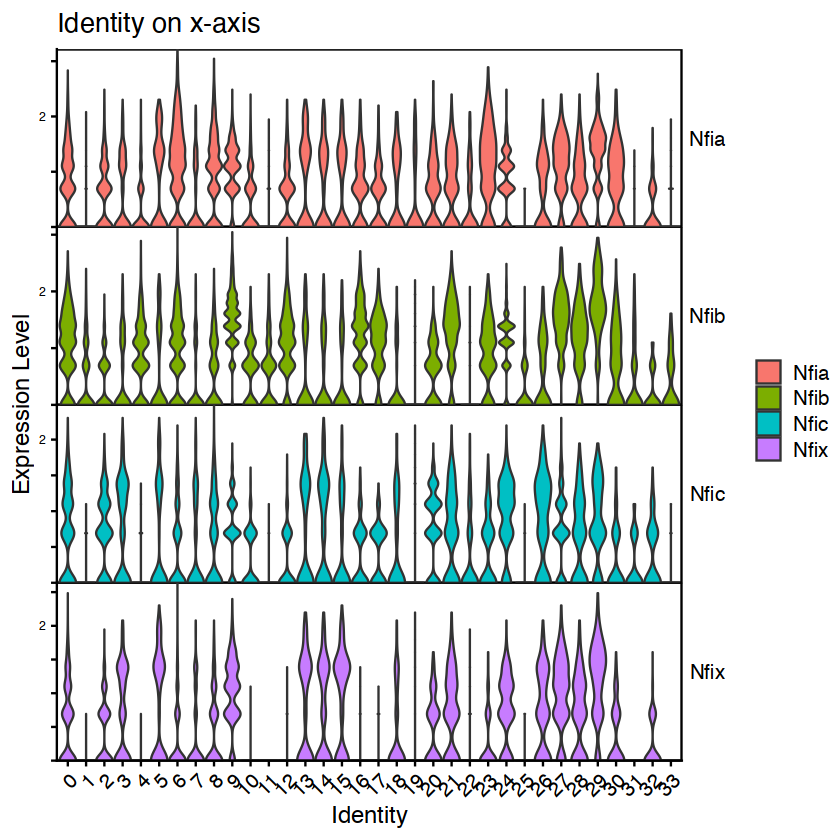

In [313]:
VlnPlot(pbmcM, c("Nfia","Nfib","Nfic","Nfix"), group.by = "Sample",  stack = TRUE, sort = FALSE, flip = TRUE) +
        theme(legend.position = "right") + ggtitle("Identity on x-axis")
VlnPlot(pbmcM, c("Nfia","Nfib","Nfic","Nfix"),  stack = TRUE, sort = FALSE, flip = TRUE) +
        theme(legend.position = "right") + ggtitle("Identity on x-axis")

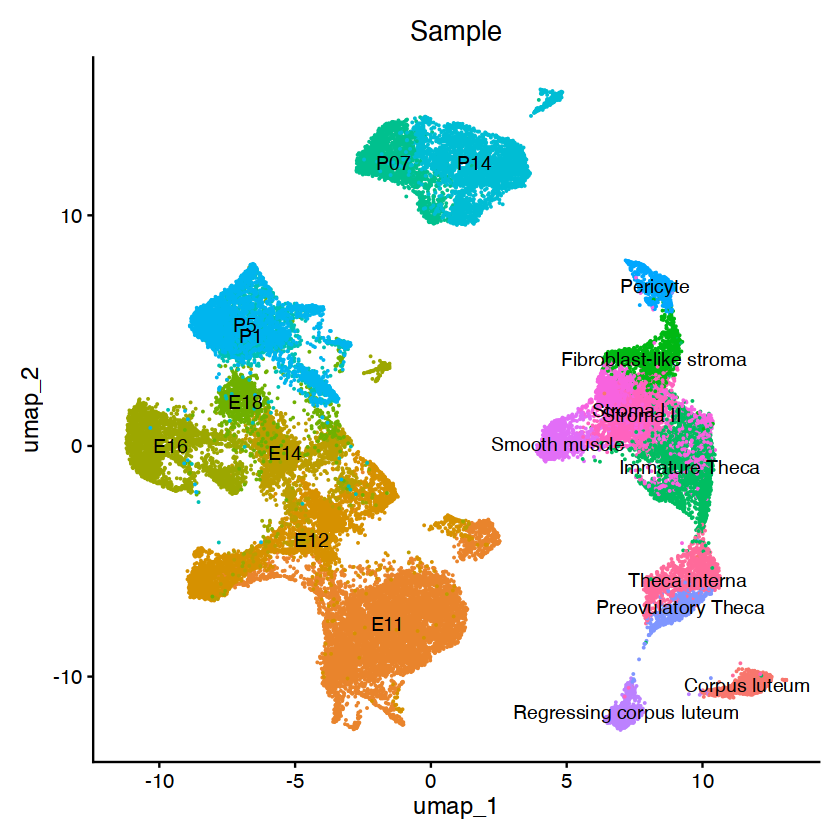

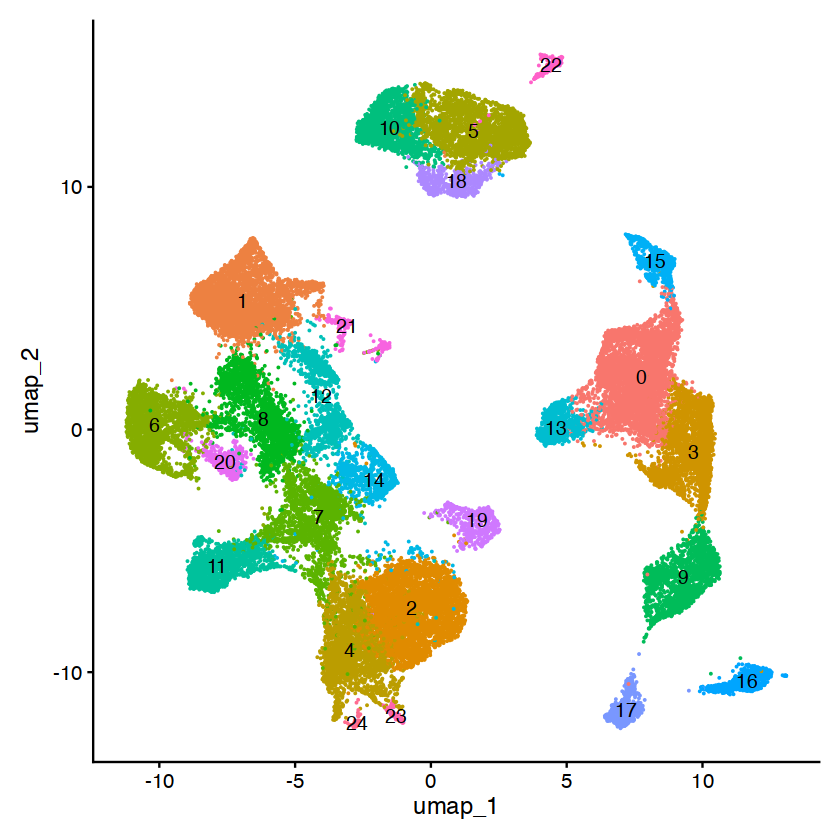

In [323]:
DimPlot(pbmcM, reduction = "umap", group.by = "Sample", label = TRUE) + NoLegend()
DimPlot(pbmcM, reduction = "umap", label = TRUE) + NoLegend()

In [324]:
#blood-related and outlayers
pbmcM <- subset(pbmcM, idents = c("24","23","2","19","11"), invert = TRUE)

In [325]:
pbmcM <- SCTransform(pbmcM, ncells = 3000 )
pbmcM <- RunPCA(pbmcM, features = VariableFeatures(object = pbmcM))
pbmcM <- RunUMAP(pbmcM, dims = 1:20)
pbmcM <- FindNeighbors(pbmcM, reduction = "pca", dims = 1:20)
pbmcM <- FindClusters(pbmcM, resolution = 1.2)

Running SCTransform on assay: SCT

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Total Step 1 genes: 11454

Total overdispersed genes: 10942

Excluding 512 genes from Step 1 because they are not overdispersed.

Variance stabilizing transformation of count matrix of size 11471 by 33088

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3000 cells



  |======================================================================| 100%


Setting estimate of  96 genes to inf as theta_mm/theta_mle < 1e-3

# of step1 poisson genes (variance < mean): 0

# of low mean genes (mean < 0.001): 9

Total # of Step1 poisson genes (theta=Inf; variance < mean): 96

Total # of poisson genes (theta=Inf; variance < mean): 523

Calling offset model for all 523 poisson genes

Found 121 outliers - those will be ignored in fitting/regularization step


Ignoring theta inf genes

Replacing fit params for 523 poisson genes by theta=Inf

Setting min_variance based on median UMI:  0.04

Second step: Get residuals using fitted parameters for 11471 genes



  |======================================================================| 100%


Computing corrected count matrix for 11471 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.582053 mins

Determine variable features

Centering data matrix

Place corrected count matrix in counts slot

Warning message:
“Different cells and/or features from existing assay SCT”
Set default assay to SCT

PC_ 1 
Positive:  Fau, Ptn, Igfbp5, Hbb-bs, Ftl1, Dlk1, Actb, Tmsb10, Ptma, Ubb 
	   Tmsb4x, Dcn, Tpt1, Eef1a1, Hsp90ab1, Mfap4, Cdkn1c, Peg3, Lsp1, Mdk 
	   Mfap2, Hba-a1, Lgals1, Hspa1a, H3f3b, Hmgb1, Sept7, Hmgb2, Hmgn2, Ifitm2 
Negative:  Hsd3b1, Cyp11a1, Gm17541, Sfrp4, Cpe, Serinc3, Aldh1a1, Acsbg1, Mgarp, Wbp5 
	   Prlr, Gja1, Star, Fdx1, Akr1cl, Scarb1, Me1, Smoc2, Ttf1, Nkain3 
	   Ephx2, Gstm1, C1s1, Nme2, Gm4076, Atp6v0c, Cyp17a1, Elovl5, Thbs1, Itga6 
PC_ 2 
Positive:  Hmga2, Cdkn1c, Igfbp5, Stmn1, Hbb-y, Peg3, Ptn, Hist1h2ap, Hmgb2, Top2a 
	   Sox11, Meis2, H2afz, Mest, Cenpf, Hsp90aa1, Ptma, Basp1, Mki67, Crabp1 
	   Igfbp2, Hsp90ab1, Nnat, Hmgb1, Hist1h2ae, Tubb5, Hist1h1b, Ncam1, Tmsb10, Asb4 
N

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 33088
Number of edges: 1150770

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9045
Number of communities: 31
Elapsed time: 6 seconds


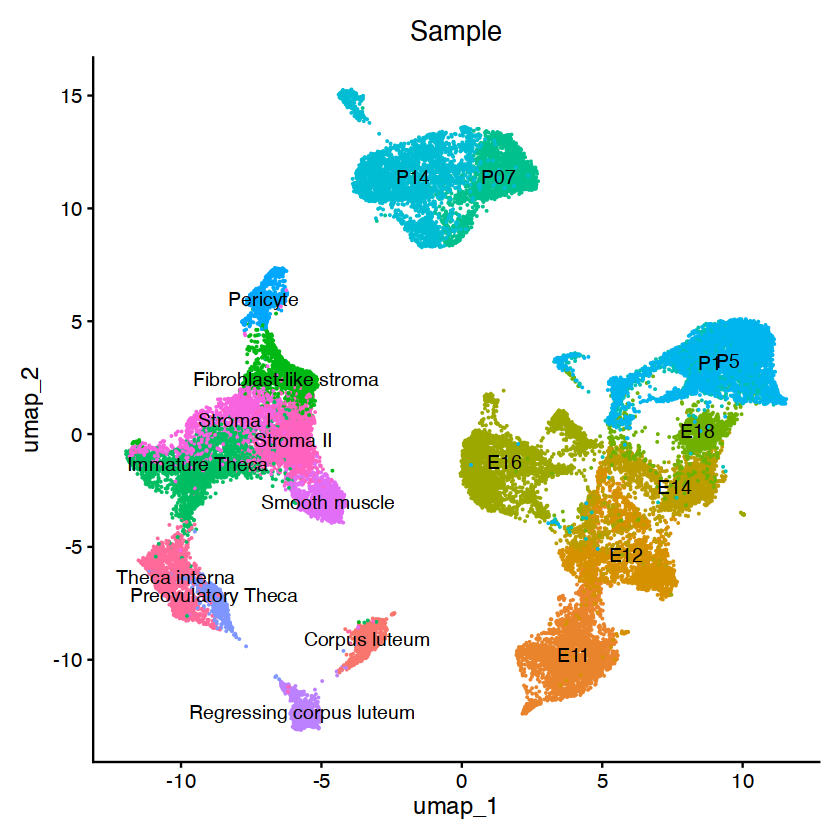

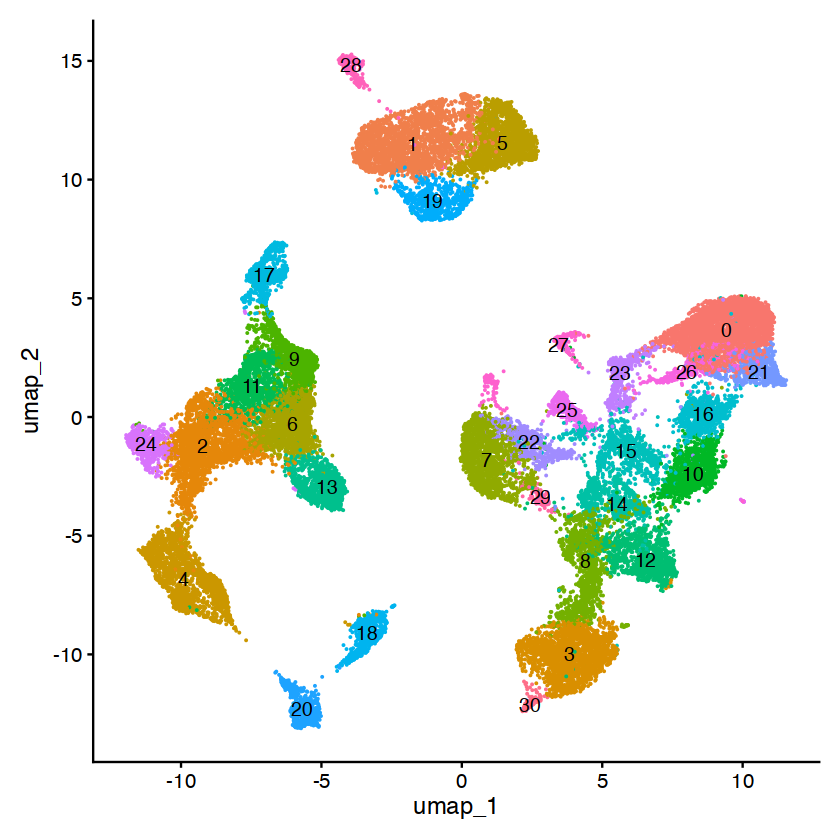

In [326]:
DimPlot(pbmcM, reduction = "umap", group.by = "Sample", label = TRUE) + NoLegend()
DimPlot(pbmcM, reduction = "umap", label = TRUE) + NoLegend()

In [328]:
#blood-related and outlayers
pbmcM <- subset(pbmcM, idents = c("7","29"), invert = TRUE)

In [329]:
pbmcM <- SCTransform(pbmcM, ncells = 3000 )
pbmcM <- RunPCA(pbmcM, features = VariableFeatures(object = pbmcM))
pbmcM <- RunUMAP(pbmcM, dims = 1:20)
pbmcM <- FindNeighbors(pbmcM, reduction = "pca", dims = 1:20)
pbmcM <- FindClusters(pbmcM, resolution = 1.2)

Running SCTransform on assay: SCT

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Total Step 1 genes: 11118

Total overdispersed genes: 10762

Excluding 356 genes from Step 1 because they are not overdispersed.

Variance stabilizing transformation of count matrix of size 11124 by 31441

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3000 cells



  |======================================================================| 100%


Setting estimate of  70 genes to inf as theta_mm/theta_mle < 1e-3

# of step1 poisson genes (variance < mean): 0

# of low mean genes (mean < 0.001): 0

Total # of Step1 poisson genes (theta=Inf; variance < mean): 70

Total # of poisson genes (theta=Inf; variance < mean): 357

Calling offset model for all 357 poisson genes

Found 73 outliers - those will be ignored in fitting/regularization step


Ignoring theta inf genes

Replacing fit params for 357 poisson genes by theta=Inf

Setting min_variance based on median UMI:  0.04

Second step: Get residuals using fitted parameters for 11124 genes



  |======================================================================| 100%


Computing corrected count matrix for 11124 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.230986 mins

Determine variable features

Centering data matrix

Place corrected count matrix in counts slot

Warning message:
“Different cells and/or features from existing assay SCT”
Set default assay to SCT

PC_ 1 
Positive:  Fau, Ptn, Hbb-bs, Ftl1, Igfbp5, Dlk1, Actb, Dcn, Ubb, Tmsb10 
	   Tmsb4x, Mfap4, Ptma, Eef1a1, Tpt1, Lsp1, Hsp90ab1, Mfap2, Cdkn1c, Mdk 
	   Peg3, Lgals1, Hba-a1, Hspa1a, Sept7, Ifitm2, H3f3b, Hmgb1, Hmgb2, Hmgn2 
Negative:  Hsd3b1, Cyp11a1, Gm17541, Sfrp4, Serinc3, Cpe, Aldh1a1, Mgarp, Acsbg1, Star 
	   Prlr, Wbp5, Gja1, Fdx1, Scarb1, Akr1cl, Me1, Smoc2, Ttf1, Nkain3 
	   Ephx2, Gstm1, Gm4076, C1s1, Nme2, Atp6v0c, Cyp17a1, Itga6, Thbs1, Elovl5 
PC_ 2 
Positive:  Hmga2, Cdkn1c, Stmn1, Hbb-y, Hist1h2ap, Hmgb2, Peg3, Top2a, Igfbp5, H2afz 
	   Sox11, Cenpf, Meis2, Ptn, Mest, Hsp90aa1, Mki67, Ptma, Basp1, Igfbp2 
	   Crabp1, Hist1h1b, Hist1h2ae, Nnat, Hmgb1, Tmsb10, Tubb5, Ube2c, Cenpe, Birc5 
Neg

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 31441
Number of edges: 1093692

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9021
Number of communities: 31
Elapsed time: 6 seconds


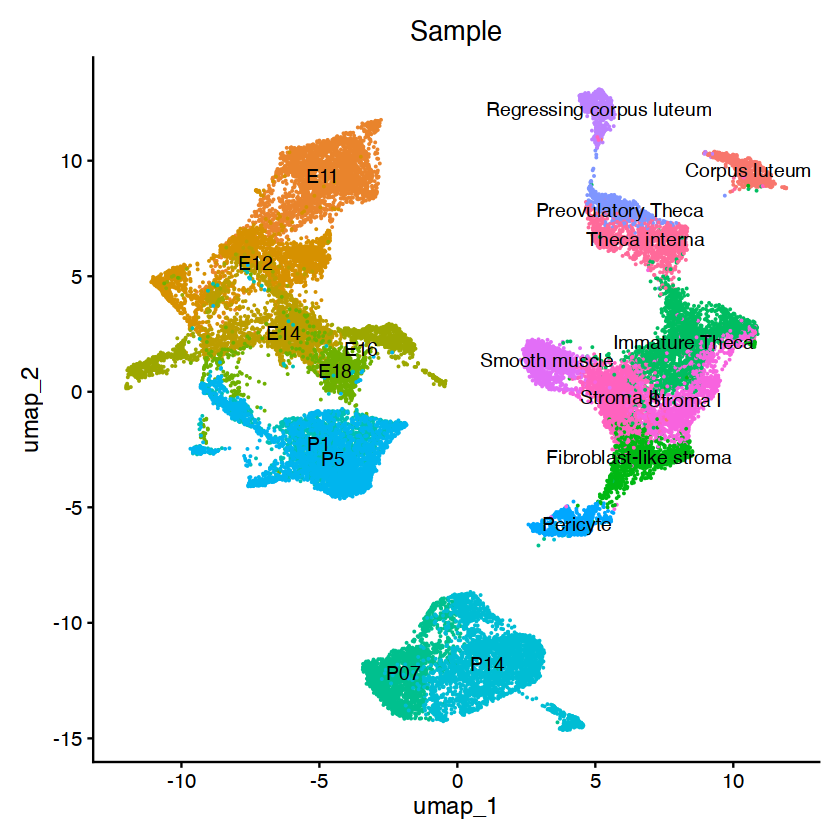

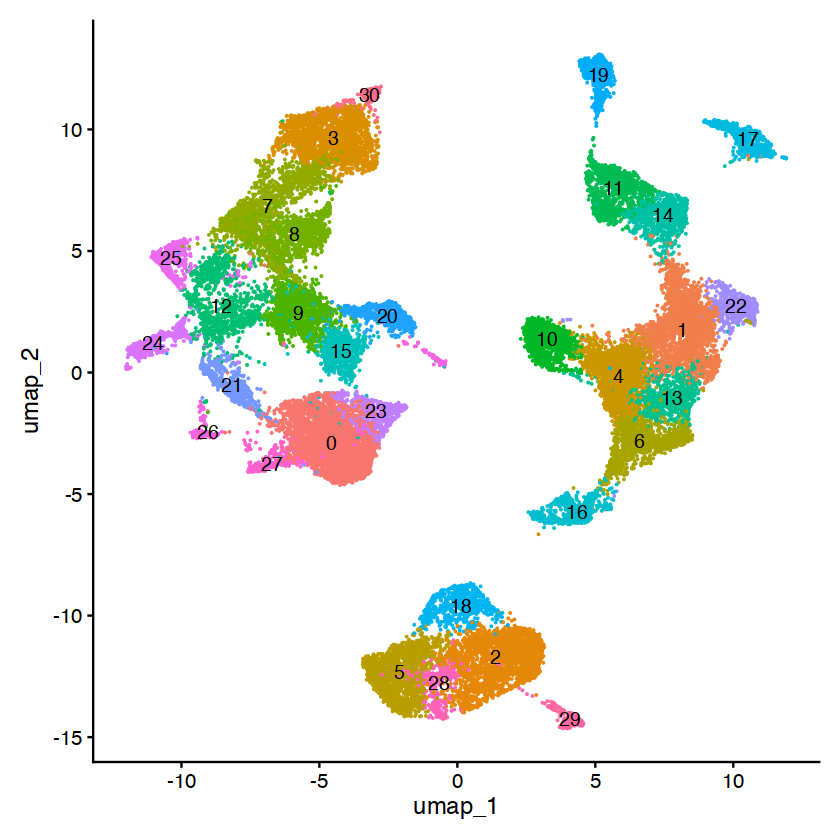

In [330]:
DimPlot(pbmcM, reduction = "umap", group.by = "Sample", label = TRUE) + NoLegend()
DimPlot(pbmcM, reduction = "umap", label = TRUE) + NoLegend()

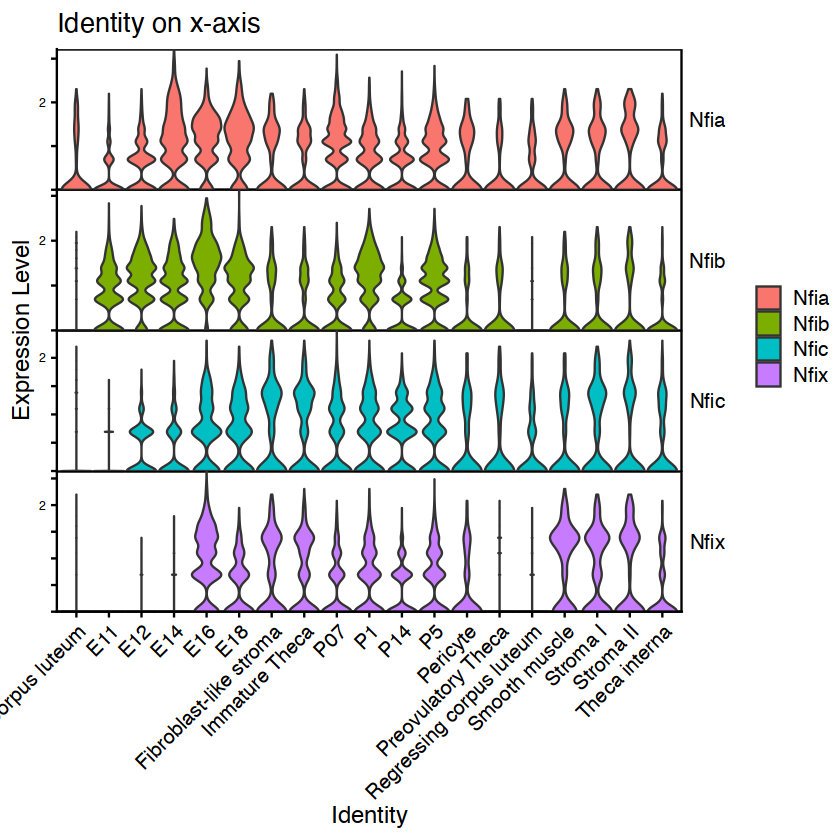

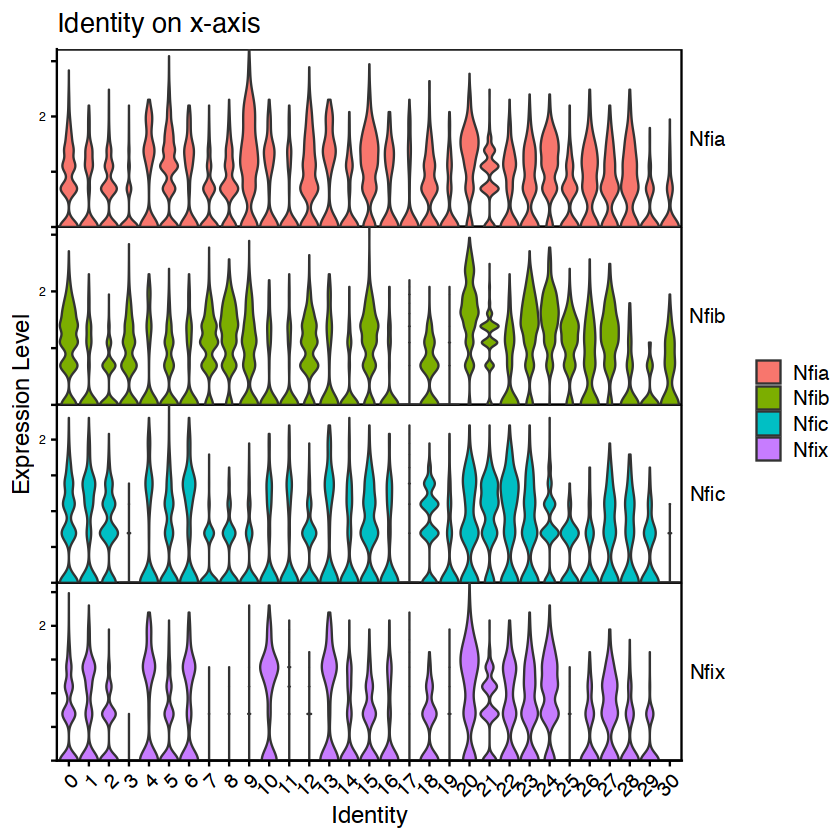

In [331]:
VlnPlot(pbmcM, c("Nfia","Nfib","Nfic","Nfix"), group.by = "Sample",  stack = TRUE, sort = FALSE, flip = TRUE) +
        theme(legend.position = "right") + ggtitle("Identity on x-axis")
VlnPlot(pbmcM, c("Nfia","Nfib","Nfic","Nfix"),  stack = TRUE, sort = FALSE, flip = TRUE) +
        theme(legend.position = "right") + ggtitle("Identity on x-axis")

In [1]:
#save(pbmcM, file = "data/MesenchymalP1-P14-Adult2.Rdata")
load(file = "data/MesenchymalP1-P5-all.Rdata")

In [336]:
pbmcTD <- pbmcM

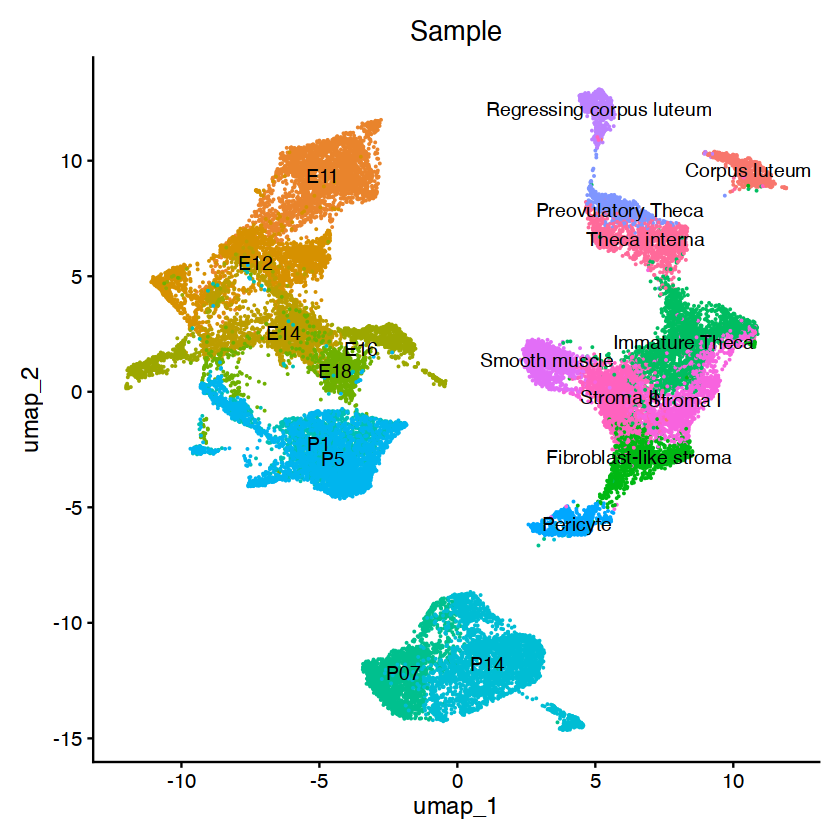

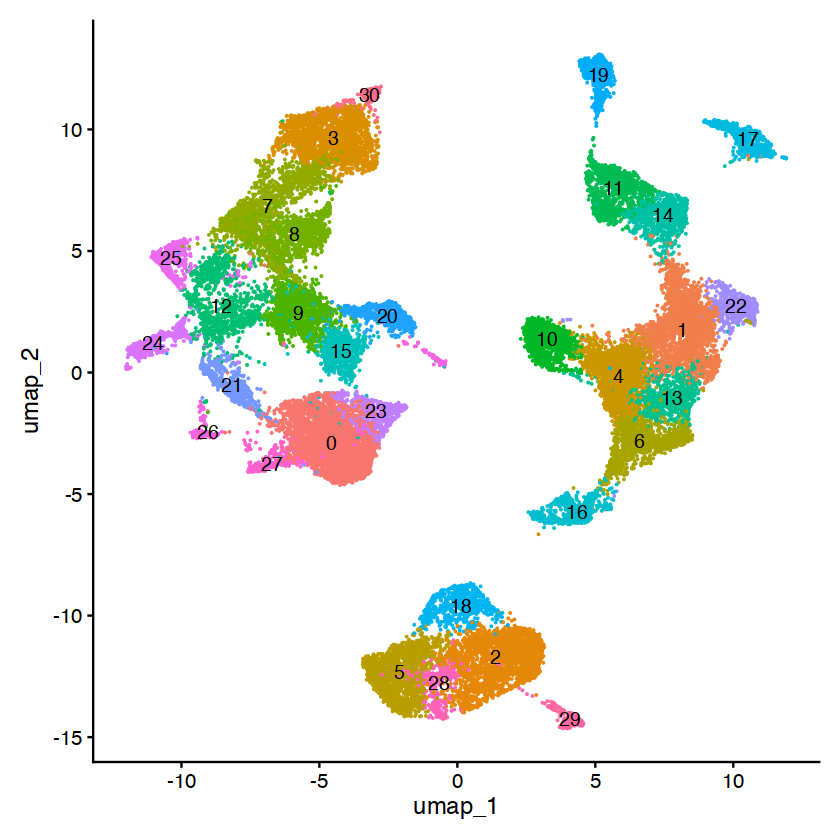

In [337]:
DimPlot(pbmcTD, reduction = "umap", group.by = "Sample", label = TRUE) + NoLegend()
DimPlot(pbmcTD, reduction = "umap", label = TRUE) + NoLegend()